In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

8it [00:00, 72.49it/s]

17it [00:00, 76.14it/s]

26it [00:00, 79.53it/s]

35it [00:00, 82.05it/s]

44it [00:00, 84.07it/s]

53it [00:00, 85.49it/s]

62it [00:00, 86.48it/s]

71it [00:00, 87.43it/s]

80it [00:00, 88.01it/s]

89it [00:01, 88.11it/s]

98it [00:01, 88.10it/s]

107it [00:01, 88.16it/s]

116it [00:01, 88.30it/s]

125it [00:01, 87.89it/s]

134it [00:01, 88.31it/s]

143it [00:01, 88.58it/s]

152it [00:01, 88.79it/s]

161it [00:01, 88.99it/s]

170it [00:01, 88.86it/s]

179it [00:02, 88.46it/s]

188it [00:02, 88.32it/s]

197it [00:02, 88.23it/s]

206it [00:02, 88.41it/s]

215it [00:02, 88.40it/s]

224it [00:02, 88.68it/s]

233it [00:02, 88.64it/s]

242it [00:02, 88.88it/s]

251it [00:02, 89.07it/s]

260it [00:02, 89.06it/s]

269it [00:03, 88.83it/s]

278it [00:03, 88.53it/s]

287it [00:03, 88.52it/s]

296it [00:03, 88.60it/s]

305it [00:03, 88.39it/s]

314it [00:03, 88.08it/s]

323it [00:03, 87.74it/s]

332it [00:03, 88.05it/s]

341it [00:03, 88.11it/s]

350it [00:03, 88.39it/s]

359it [00:04, 88.37it/s]

368it [00:04, 88.51it/s]

377it [00:04, 88.18it/s]

386it [00:04, 88.46it/s]

395it [00:04, 88.74it/s]

404it [00:04, 88.64it/s]

413it [00:04, 88.53it/s]

422it [00:04, 88.15it/s]

431it [00:04, 87.76it/s]

440it [00:04, 87.93it/s]

449it [00:05, 88.31it/s]

458it [00:05, 88.33it/s]

467it [00:05, 88.11it/s]

476it [00:05, 87.90it/s]

485it [00:05, 88.13it/s]

494it [00:05, 88.60it/s]

503it [00:05, 88.98it/s]

512it [00:05, 89.23it/s]

521it [00:05, 88.25it/s]

530it [00:06, 88.29it/s]

539it [00:06, 88.37it/s]

548it [00:06, 88.64it/s]

557it [00:06, 88.77it/s]

566it [00:06, 88.09it/s]

575it [00:06, 87.87it/s]

584it [00:06, 87.69it/s]

593it [00:06, 88.05it/s]

602it [00:06, 88.13it/s]

611it [00:06, 88.13it/s]

620it [00:07, 88.36it/s]

629it [00:07, 88.54it/s]

638it [00:07, 88.84it/s]

647it [00:07, 88.70it/s]

656it [00:07, 88.58it/s]

665it [00:07, 88.82it/s]

674it [00:07, 88.80it/s]

683it [00:07, 88.68it/s]

692it [00:07, 88.35it/s]

701it [00:07, 88.23it/s]

710it [00:08, 88.42it/s]

719it [00:08, 88.15it/s]

728it [00:08, 88.27it/s]

737it [00:08, 88.47it/s]

746it [00:08, 88.36it/s]

755it [00:08, 88.57it/s]

764it [00:08, 88.84it/s]

773it [00:08, 89.07it/s]

782it [00:08, 89.07it/s]

791it [00:08, 89.34it/s]

800it [00:09, 89.07it/s]

809it [00:09, 88.85it/s]

818it [00:09, 88.67it/s]

827it [00:09, 88.67it/s]

836it [00:09, 88.98it/s]

845it [00:09, 89.22it/s]

854it [00:09, 89.34it/s]

863it [00:09, 89.44it/s]

872it [00:09, 89.44it/s]

881it [00:09, 89.56it/s]

890it [00:10, 89.53it/s]

899it [00:10, 89.17it/s]

908it [00:10, 89.25it/s]

917it [00:10, 88.83it/s]

926it [00:10, 88.76it/s]

935it [00:10, 88.71it/s]

944it [00:10, 88.60it/s]

953it [00:10, 88.50it/s]

962it [00:10, 88.36it/s]

971it [00:10, 88.26it/s]

980it [00:11, 88.05it/s]

989it [00:11, 88.35it/s]

998it [00:11, 88.58it/s]

1007it [00:11, 88.72it/s]

1016it [00:11, 88.89it/s]

1026it [00:11, 89.07it/s]

1035it [00:11, 89.12it/s]

1044it [00:11, 88.28it/s]

1053it [00:11, 88.09it/s]

1062it [00:12, 87.93it/s]

1071it [00:12, 87.83it/s]

1080it [00:12, 87.88it/s]

1089it [00:12, 88.20it/s]

1098it [00:12, 88.01it/s]

1107it [00:12, 87.94it/s]

1116it [00:12, 87.99it/s]

1125it [00:12, 88.15it/s]

1134it [00:12, 88.15it/s]

1143it [00:12, 88.13it/s]

1152it [00:13, 88.42it/s]

1161it [00:13, 88.65it/s]

1170it [00:13, 88.89it/s]

1179it [00:13, 88.83it/s]

1188it [00:13, 88.86it/s]

1197it [00:13, 89.09it/s]

1206it [00:13, 89.21it/s]

1215it [00:13, 89.27it/s]

1224it [00:13, 89.38it/s]

1233it [00:13, 89.39it/s]

1242it [00:14, 89.55it/s]

1251it [00:14, 89.52it/s]

1260it [00:14, 88.99it/s]

1269it [00:14, 89.15it/s]

1278it [00:14, 89.34it/s]

1287it [00:14, 89.34it/s]

1296it [00:14, 89.07it/s]

1305it [00:14, 89.12it/s]

1314it [00:14, 89.23it/s]

1323it [00:14, 89.33it/s]

1332it [00:15, 89.35it/s]

1341it [00:15, 88.97it/s]

1350it [00:15, 88.67it/s]

1359it [00:15, 88.45it/s]

1368it [00:15, 88.53it/s]

1377it [00:15, 88.29it/s]

1386it [00:15, 87.79it/s]

1395it [00:15, 87.93it/s]

1404it [00:15, 87.86it/s]

1413it [00:15, 88.18it/s]

1422it [00:16, 88.15it/s]

1431it [00:16, 88.12it/s]

1440it [00:16, 88.27it/s]

1449it [00:16, 88.18it/s]

1458it [00:16, 88.17it/s]

1467it [00:16, 88.19it/s]

1476it [00:16, 88.10it/s]

1485it [00:16, 88.06it/s]

1494it [00:16, 88.05it/s]

1503it [00:16, 88.21it/s]

1512it [00:17, 88.33it/s]

1521it [00:17, 88.43it/s]

1530it [00:17, 88.48it/s]

1539it [00:17, 88.22it/s]

1548it [00:17, 88.12it/s]

1557it [00:17, 88.47it/s]

1566it [00:17, 88.37it/s]

1575it [00:17, 88.24it/s]

1584it [00:17, 88.17it/s]

1593it [00:18, 88.01it/s]

1602it [00:18, 87.93it/s]

1611it [00:18, 88.02it/s]

1620it [00:18, 88.25it/s]

1629it [00:18, 88.58it/s]

1638it [00:18, 88.69it/s]

1647it [00:18, 88.88it/s]

1656it [00:18, 89.15it/s]

1665it [00:18, 89.33it/s]

1674it [00:18, 89.34it/s]

1683it [00:19, 89.04it/s]

1692it [00:19, 89.16it/s]

1701it [00:19, 88.92it/s]

1710it [00:19, 88.72it/s]

1719it [00:19, 88.87it/s]

1728it [00:19, 88.56it/s]

1737it [00:19, 88.33it/s]

1746it [00:19, 88.44it/s]

1755it [00:19, 88.29it/s]

1764it [00:19, 87.94it/s]

1773it [00:20, 87.59it/s]

1782it [00:20, 87.58it/s]

1791it [00:20, 87.86it/s]

1800it [00:20, 87.89it/s]

1809it [00:20, 88.48it/s]

1818it [00:20, 88.67it/s]

1827it [00:20, 88.98it/s]

1837it [00:20, 89.29it/s]

1846it [00:20, 89.07it/s]

1855it [00:20, 88.99it/s]

1865it [00:21, 89.30it/s]

1874it [00:21, 89.01it/s]

1883it [00:21, 88.85it/s]

1892it [00:21, 88.84it/s]

1901it [00:21, 88.71it/s]

1910it [00:21, 88.54it/s]

1919it [00:21, 88.49it/s]

1928it [00:21, 88.56it/s]

1937it [00:21, 88.63it/s]

1946it [00:21, 88.49it/s]

1955it [00:22, 88.66it/s]

1964it [00:22, 89.02it/s]

1974it [00:22, 89.49it/s]

1983it [00:22, 88.94it/s]

1992it [00:22, 88.78it/s]

2001it [00:22, 88.69it/s]

2010it [00:22, 88.44it/s]

2019it [00:22, 88.50it/s]

2028it [00:22, 88.56it/s]

2037it [00:23, 88.65it/s]

2046it [00:23, 88.78it/s]

2055it [00:23, 88.39it/s]

2064it [00:23, 88.51it/s]

2073it [00:23, 88.67it/s]

2082it [00:23, 88.85it/s]

2091it [00:23, 88.24it/s]

2100it [00:23, 87.99it/s]

2109it [00:23, 88.08it/s]

2118it [00:23, 88.35it/s]

2127it [00:24, 88.37it/s]

2136it [00:24, 87.63it/s]

2145it [00:24, 88.12it/s]

2154it [00:24, 88.14it/s]

2163it [00:24, 88.05it/s]

2172it [00:24, 88.15it/s]

2181it [00:24, 88.53it/s]

2190it [00:24, 88.39it/s]

2199it [00:24, 88.18it/s]

2208it [00:24, 88.41it/s]

2217it [00:25, 88.32it/s]

2226it [00:25, 88.27it/s]

2235it [00:25, 88.39it/s]

2244it [00:25, 88.29it/s]

2253it [00:25, 88.27it/s]

2262it [00:25, 88.56it/s]

2271it [00:25, 88.34it/s]

2280it [00:25, 88.38it/s]

2289it [00:25, 87.62it/s]

2298it [00:25, 87.13it/s]

2307it [00:26, 87.32it/s]

2316it [00:26, 87.41it/s]

2325it [00:26, 87.52it/s]

2334it [00:26, 87.70it/s]

2343it [00:26, 87.65it/s]

2352it [00:26, 88.10it/s]

2361it [00:26, 88.48it/s]

2370it [00:26, 88.45it/s]

2379it [00:26, 87.85it/s]

2388it [00:27, 87.34it/s]

2397it [00:27, 87.47it/s]

2406it [00:27, 87.84it/s]

2415it [00:27, 88.15it/s]

2424it [00:27, 88.47it/s]

2433it [00:27, 88.68it/s]

2442it [00:27, 88.77it/s]

2451it [00:27, 88.69it/s]

2460it [00:27, 88.89it/s]

2469it [00:27, 88.94it/s]

2478it [00:28, 88.58it/s]

2487it [00:28, 88.44it/s]

2496it [00:28, 88.39it/s]

2505it [00:28, 88.34it/s]

2514it [00:28, 87.98it/s]

2523it [00:28, 87.82it/s]

2532it [00:28, 87.94it/s]

2541it [00:28, 87.97it/s]

2550it [00:28, 87.91it/s]

2559it [00:28, 87.91it/s]

2568it [00:29, 88.21it/s]

2577it [00:29, 88.10it/s]

2586it [00:29, 88.19it/s]

2595it [00:29, 88.42it/s]

2604it [00:29, 88.56it/s]

2613it [00:29, 88.59it/s]

2622it [00:29, 88.71it/s]

2631it [00:29, 88.80it/s]

2640it [00:29, 88.82it/s]

2649it [00:29, 88.62it/s]

2658it [00:30, 88.79it/s]

2667it [00:30, 88.42it/s]

2676it [00:30, 88.54it/s]

2685it [00:30, 88.46it/s]

2694it [00:30, 88.68it/s]

2703it [00:30, 88.62it/s]

2712it [00:30, 88.71it/s]

2721it [00:30, 88.55it/s]

2730it [00:30, 88.57it/s]

2739it [00:30, 88.73it/s]

2748it [00:31, 88.93it/s]

2757it [00:31, 88.79it/s]

2766it [00:31, 88.34it/s]

2775it [00:31, 88.47it/s]

2784it [00:31, 88.68it/s]

2793it [00:31, 88.84it/s]

2802it [00:31, 88.91it/s]

2811it [00:31, 89.04it/s]

2820it [00:31, 88.61it/s]

2829it [00:31, 88.56it/s]

2838it [00:32, 88.32it/s]

2847it [00:32, 88.47it/s]

2856it [00:32, 88.42it/s]

2865it [00:32, 88.32it/s]

2874it [00:32, 88.27it/s]

2883it [00:32, 88.39it/s]

2892it [00:32, 88.43it/s]

2901it [00:32, 88.40it/s]

2910it [00:32, 88.23it/s]

2919it [00:33, 88.19it/s]

2928it [00:33, 88.32it/s]

2937it [00:33, 88.53it/s]

2946it [00:33, 88.66it/s]

2955it [00:33, 88.78it/s]

2964it [00:33, 88.60it/s]

2973it [00:33, 88.78it/s]

2982it [00:33, 88.65it/s]

2991it [00:33, 88.39it/s]

3000it [00:33, 88.21it/s]

3009it [00:34, 88.16it/s]

3018it [00:34, 88.35it/s]

3027it [00:34, 88.63it/s]

3036it [00:34, 88.48it/s]

3045it [00:34, 88.32it/s]

3054it [00:34, 88.37it/s]

3063it [00:34, 88.61it/s]

3072it [00:34, 88.70it/s]

3081it [00:34, 88.40it/s]

3090it [00:34, 88.44it/s]

3099it [00:35, 88.45it/s]

3108it [00:35, 88.40it/s]

3117it [00:35, 88.48it/s]

3126it [00:35, 88.49it/s]

3135it [00:35, 88.64it/s]

3144it [00:35, 88.90it/s]

3153it [00:35, 89.08it/s]

3162it [00:35, 88.99it/s]

3171it [00:35, 89.27it/s]

3180it [00:35, 88.94it/s]

3189it [00:36, 88.90it/s]

3198it [00:36, 88.84it/s]

3207it [00:36, 88.77it/s]

3216it [00:36, 88.47it/s]

3225it [00:36, 88.17it/s]

3234it [00:36, 87.97it/s]

3243it [00:36, 87.71it/s]

3252it [00:36, 87.81it/s]

3261it [00:36, 87.97it/s]

3270it [00:36, 88.19it/s]

3279it [00:37, 88.43it/s]

3288it [00:37, 88.36it/s]

3297it [00:37, 88.53it/s]

3306it [00:37, 88.77it/s]

3315it [00:37, 88.78it/s]

3324it [00:37, 88.57it/s]

3333it [00:37, 88.28it/s]

3342it [00:37, 88.30it/s]

3351it [00:37, 88.46it/s]

3360it [00:37, 88.54it/s]

3369it [00:38, 88.76it/s]

3378it [00:38, 88.87it/s]

3387it [00:38, 88.96it/s]

3396it [00:38, 88.45it/s]

3405it [00:38, 88.13it/s]

3414it [00:38, 88.02it/s]

3423it [00:38, 87.99it/s]

3432it [00:38, 88.02it/s]

3441it [00:38, 87.96it/s]

3450it [00:39, 88.01it/s]

3459it [00:39, 87.97it/s]

3468it [00:39, 88.04it/s]

3477it [00:39, 88.01it/s]

3486it [00:39, 88.03it/s]

3495it [00:39, 88.24it/s]

3504it [00:39, 88.29it/s]

3513it [00:39, 88.53it/s]

3522it [00:39, 88.66it/s]

3531it [00:39, 88.34it/s]

3540it [00:40, 88.30it/s]

3549it [00:40, 87.93it/s]

3558it [00:40, 87.79it/s]

3567it [00:40, 87.80it/s]

3576it [00:40, 87.94it/s]

3585it [00:40, 87.70it/s]

3594it [00:40, 87.87it/s]

3603it [00:40, 88.19it/s]

3612it [00:40, 87.94it/s]

3621it [00:40, 87.11it/s]

3630it [00:41, 86.72it/s]

3639it [00:41, 86.86it/s]

3648it [00:41, 87.18it/s]

3657it [00:41, 86.97it/s]

3666it [00:41, 87.35it/s]

3675it [00:41, 87.53it/s]

3684it [00:41, 87.75it/s]

3693it [00:41, 87.99it/s]

3702it [00:41, 88.01it/s]

3711it [00:41, 88.04it/s]

3720it [00:42, 88.18it/s]

3729it [00:42, 87.75it/s]

3738it [00:42, 87.83it/s]

3747it [00:42, 88.20it/s]

3756it [00:42, 88.21it/s]

3765it [00:42, 88.44it/s]

3774it [00:42, 88.36it/s]

3783it [00:42, 88.17it/s]

3792it [00:42, 87.88it/s]

3801it [00:42, 88.26it/s]

3810it [00:43, 88.49it/s]

3819it [00:43, 88.66it/s]

3828it [00:43, 88.81it/s]

3837it [00:43, 88.88it/s]

3846it [00:43, 88.92it/s]

3855it [00:43, 89.03it/s]

3864it [00:43, 88.80it/s]

3873it [00:43, 88.62it/s]

3882it [00:43, 88.67it/s]

3891it [00:44, 88.90it/s]

3900it [00:44, 88.73it/s]

3909it [00:44, 88.78it/s]

3918it [00:44, 88.93it/s]

3927it [00:44, 88.96it/s]

3936it [00:44, 89.05it/s]

3945it [00:44, 89.28it/s]

3954it [00:44, 88.97it/s]

3963it [00:44, 88.54it/s]

3972it [00:44, 88.50it/s]

3981it [00:45, 88.89it/s]

3990it [00:45, 88.99it/s]

3999it [00:45, 89.07it/s]

4008it [00:45, 89.18it/s]

4017it [00:45, 88.79it/s]

4026it [00:45, 88.85it/s]

4035it [00:45, 89.05it/s]

4044it [00:45, 89.11it/s]

4053it [00:45, 88.84it/s]

4062it [00:45, 87.87it/s]

4071it [00:46, 87.89it/s]

4080it [00:46, 87.81it/s]

4089it [00:46, 88.18it/s]

4098it [00:46, 88.05it/s]

4107it [00:46, 88.06it/s]

4116it [00:46, 88.37it/s]

4125it [00:46, 88.64it/s]

4134it [00:46, 88.76it/s]

4143it [00:46, 88.73it/s]

4152it [00:46, 88.51it/s]

4161it [00:47, 88.45it/s]

4170it [00:47, 88.66it/s]

4179it [00:47, 88.74it/s]

4188it [00:47, 88.85it/s]

4197it [00:47, 88.95it/s]

4206it [00:47, 89.04it/s]

4215it [00:47, 89.12it/s]

4224it [00:47, 88.79it/s]

4233it [00:47, 88.57it/s]

4242it [00:47, 88.58it/s]

4251it [00:48, 88.61it/s]

4260it [00:48, 88.87it/s]

4269it [00:48, 88.65it/s]

4278it [00:48, 88.45it/s]

4287it [00:48, 88.54it/s]

4296it [00:48, 88.62it/s]

4305it [00:48, 88.43it/s]

4314it [00:48, 88.26it/s]

4323it [00:48, 88.25it/s]

4332it [00:48, 88.19it/s]

4341it [00:49, 88.11it/s]

4350it [00:49, 87.52it/s]

4359it [00:49, 87.55it/s]

4368it [00:49, 87.79it/s]

4377it [00:49, 88.01it/s]

4386it [00:49, 87.99it/s]

4395it [00:49, 88.27it/s]

4404it [00:49, 88.58it/s]

4413it [00:49, 88.84it/s]

4422it [00:50, 88.83it/s]

4431it [00:50, 88.46it/s]

4440it [00:50, 88.37it/s]

4449it [00:50, 88.34it/s]

4458it [00:50, 88.24it/s]

4467it [00:50, 88.27it/s]

4476it [00:50, 88.49it/s]

4485it [00:50, 88.27it/s]

4494it [00:50, 88.37it/s]

4503it [00:50, 88.35it/s]

4512it [00:51, 88.32it/s]

4521it [00:51, 88.35it/s]

4530it [00:51, 88.29it/s]

4539it [00:51, 88.50it/s]

4548it [00:51, 88.72it/s]

4557it [00:51, 88.88it/s]

4566it [00:51, 88.90it/s]

4575it [00:51, 88.91it/s]

4584it [00:51, 88.56it/s]

4593it [00:51, 88.03it/s]

4602it [00:52, 88.27it/s]

4611it [00:52, 88.06it/s]

4620it [00:52, 88.19it/s]

4629it [00:52, 88.45it/s]

4638it [00:52, 88.27it/s]

4647it [00:52, 88.31it/s]

4656it [00:52, 88.38it/s]

4665it [00:52, 88.57it/s]

4674it [00:52, 88.29it/s]

4683it [00:52, 87.85it/s]

4692it [00:53, 87.93it/s]

4701it [00:53, 87.80it/s]

4710it [00:53, 87.64it/s]

4719it [00:53, 87.38it/s]

4728it [00:53, 87.53it/s]

4737it [00:53, 87.80it/s]

4746it [00:53, 87.96it/s]

4755it [00:53, 87.90it/s]

4764it [00:53, 87.72it/s]

4773it [00:53, 87.78it/s]

4782it [00:54, 87.76it/s]

4791it [00:54, 87.76it/s]

4800it [00:54, 87.83it/s]

4809it [00:54, 86.82it/s]

4818it [00:54, 86.63it/s]

4827it [00:54, 86.67it/s]

4836it [00:54, 87.06it/s]

4845it [00:54, 87.26it/s]

4854it [00:54, 87.31it/s]

4863it [00:55, 87.90it/s]

4872it [00:55, 88.37it/s]

4881it [00:55, 88.62it/s]

4890it [00:55, 88.48it/s]

4899it [00:55, 88.46it/s]

4908it [00:55, 88.28it/s]

4917it [00:55, 88.36it/s]

4926it [00:55, 88.44it/s]

4935it [00:55, 88.38it/s]

4944it [00:55, 88.23it/s]

4953it [00:56, 88.07it/s]

4962it [00:56, 88.22it/s]

4971it [00:56, 88.31it/s]

4980it [00:56, 87.79it/s]

4989it [00:56, 88.07it/s]

4998it [00:56, 88.19it/s]

5007it [00:56, 88.35it/s]

5016it [00:56, 88.20it/s]

5025it [00:56, 88.28it/s]

5034it [00:56, 88.53it/s]

5043it [00:57, 88.42it/s]

5052it [00:57, 74.51it/s]

5061it [00:57, 78.06it/s]

5070it [00:57, 80.57it/s]

5079it [00:57, 82.35it/s]

5088it [00:57, 84.26it/s]

5097it [00:57, 85.64it/s]

5106it [00:57, 86.29it/s]

5115it [00:57, 86.91it/s]

5124it [00:58, 87.34it/s]

5133it [00:58, 87.46it/s]

5142it [00:58, 87.69it/s]

5151it [00:58, 87.83it/s]

5160it [00:58, 87.87it/s]

5169it [00:58, 88.08it/s]

5178it [00:58, 88.32it/s]

5187it [00:58, 88.71it/s]

5196it [00:58, 88.68it/s]

5205it [00:58, 88.54it/s]

5214it [00:59, 88.23it/s]

5223it [00:59, 87.75it/s]

5232it [00:59, 88.08it/s]

5241it [00:59, 88.24it/s]

5250it [00:59, 88.24it/s]

5259it [00:59, 88.43it/s]

5268it [00:59, 88.59it/s]

5277it [00:59, 88.74it/s]

5286it [00:59, 88.82it/s]

5295it [00:59, 88.89it/s]

5304it [01:00, 88.98it/s]

5313it [01:00, 88.86it/s]

5322it [01:00, 88.96it/s]

5331it [01:00, 89.02it/s]

5340it [01:00, 88.67it/s]

5349it [01:00, 88.54it/s]

5358it [01:00, 88.42it/s]

5367it [01:00, 88.24it/s]

5376it [01:00, 88.30it/s]

5385it [01:00, 88.79it/s]

5394it [01:01, 88.80it/s]

5403it [01:01, 88.73it/s]

5412it [01:01, 88.56it/s]

5421it [01:01, 88.38it/s]

5430it [01:01, 88.34it/s]

5439it [01:01, 88.29it/s]

5448it [01:01, 88.25it/s]

5457it [01:01, 88.17it/s]

5466it [01:01, 88.10it/s]

5475it [01:02, 88.47it/s]

5484it [01:02, 88.78it/s]

5493it [01:02, 88.95it/s]

5502it [01:02, 88.73it/s]

5511it [01:02, 88.48it/s]

5520it [01:02, 88.47it/s]

5529it [01:02, 88.75it/s]

5538it [01:02, 88.84it/s]

5547it [01:02, 88.68it/s]

5556it [01:02, 88.76it/s]

5565it [01:03, 88.72it/s]

5574it [01:03, 88.61it/s]

5583it [01:03, 88.53it/s]

5592it [01:03, 88.76it/s]

5601it [01:03, 88.55it/s]

5610it [01:03, 88.35it/s]

5619it [01:03, 88.35it/s]

5628it [01:03, 88.32it/s]

5637it [01:03, 88.22it/s]

5647it [01:03, 89.17it/s]

5656it [01:04, 88.99it/s]

5665it [01:04, 88.68it/s]

5674it [01:04, 88.52it/s]

5683it [01:04, 88.59it/s]

5692it [01:04, 88.57it/s]

5701it [01:04, 88.68it/s]

5710it [01:04, 88.76it/s]

5719it [01:04, 88.95it/s]

5728it [01:04, 89.08it/s]

5737it [01:04, 88.63it/s]

5746it [01:05, 88.76it/s]

5755it [01:05, 88.93it/s]

5764it [01:05, 89.16it/s]

5773it [01:05, 89.25it/s]

5782it [01:05, 89.11it/s]

5791it [01:05, 88.78it/s]

5800it [01:05, 88.29it/s]

5809it [01:05, 88.48it/s]

5818it [01:05, 88.02it/s]

5827it [01:05, 87.95it/s]

5836it [01:06, 87.25it/s]

5845it [01:06, 86.99it/s]

5854it [01:06, 87.14it/s]

5863it [01:06, 87.34it/s]

5872it [01:06, 87.53it/s]

5881it [01:06, 87.73it/s]

5890it [01:06, 88.09it/s]

5899it [01:06, 88.28it/s]

5908it [01:06, 88.16it/s]

5917it [01:07, 88.06it/s]

5926it [01:07, 87.87it/s]

5935it [01:07, 88.07it/s]

5944it [01:07, 88.20it/s]

5953it [01:07, 88.12it/s]

5962it [01:07, 88.11it/s]

5971it [01:07, 88.50it/s]

5980it [01:07, 88.75it/s]

5989it [01:07, 88.53it/s]

5998it [01:07, 88.48it/s]

6007it [01:08, 88.53it/s]

6016it [01:08, 88.50it/s]

6025it [01:08, 88.47it/s]

6034it [01:08, 88.44it/s]

6043it [01:08, 88.25it/s]

6052it [01:08, 88.54it/s]

6061it [01:08, 88.44it/s]

6070it [01:08, 88.64it/s]

6079it [01:08, 88.18it/s]

6088it [01:08, 87.83it/s]

6097it [01:09, 87.77it/s]

6106it [01:09, 87.96it/s]

6115it [01:09, 88.21it/s]

6124it [01:09, 88.41it/s]

6133it [01:09, 88.26it/s]

6142it [01:09, 88.54it/s]

6151it [01:09, 88.72it/s]

6160it [01:09, 88.66it/s]

6169it [01:09, 88.70it/s]

6178it [01:09, 88.29it/s]

6187it [01:10, 87.94it/s]

6196it [01:10, 87.78it/s]

6205it [01:10, 88.01it/s]

6214it [01:10, 88.19it/s]

6223it [01:10, 88.37it/s]

6232it [01:10, 88.52it/s]

6241it [01:10, 88.75it/s]

6250it [01:10, 88.59it/s]

6259it [01:10, 88.44it/s]

6268it [01:10, 88.07it/s]

6277it [01:11, 88.04it/s]

6286it [01:11, 88.07it/s]

6295it [01:11, 88.01it/s]

6304it [01:11, 88.01it/s]

6313it [01:11, 88.01it/s]

6322it [01:11, 88.02it/s]

6331it [01:11, 88.11it/s]

6340it [01:11, 87.89it/s]

6349it [01:11, 87.86it/s]

6358it [01:11, 88.16it/s]

6367it [01:12, 88.37it/s]

6376it [01:12, 88.55it/s]

6385it [01:12, 88.33it/s]

6394it [01:12, 88.18it/s]

6403it [01:12, 87.57it/s]

6412it [01:12, 87.91it/s]

6421it [01:12, 87.79it/s]

6430it [01:12, 87.88it/s]

6439it [01:12, 87.89it/s]

6448it [01:13, 87.98it/s]

6457it [01:13, 88.22it/s]

6466it [01:13, 88.42it/s]

6475it [01:13, 88.27it/s]

6484it [01:13, 88.02it/s]

6493it [01:13, 87.95it/s]

6502it [01:13, 87.98it/s]

6511it [01:13, 88.11it/s]

6520it [01:13, 88.18it/s]

6529it [01:13, 88.17it/s]

6538it [01:14, 88.32it/s]

6547it [01:14, 88.63it/s]

6556it [01:14, 88.94it/s]

6565it [01:14, 89.00it/s]

6574it [01:14, 89.27it/s]

6583it [01:14, 89.35it/s]

6592it [01:14, 89.23it/s]

6601it [01:14, 89.08it/s]

6610it [01:14, 89.13it/s]

6619it [01:14, 88.71it/s]

6628it [01:15, 88.47it/s]

6637it [01:15, 88.49it/s]

6646it [01:15, 88.41it/s]

6655it [01:15, 88.59it/s]

6664it [01:15, 88.47it/s]

6673it [01:15, 88.17it/s]

6682it [01:15, 88.38it/s]

6691it [01:15, 88.20it/s]

6700it [01:15, 88.38it/s]

6709it [01:15, 88.53it/s]

6718it [01:16, 88.78it/s]

6727it [01:16, 88.63it/s]

6736it [01:16, 88.46it/s]

6745it [01:16, 88.43it/s]

6754it [01:16, 88.62it/s]

6763it [01:16, 88.73it/s]

6772it [01:16, 88.78it/s]

6781it [01:16, 88.53it/s]

6790it [01:16, 88.34it/s]

6799it [01:16, 88.43it/s]

6808it [01:17, 88.42it/s]

6817it [01:17, 88.46it/s]

6826it [01:17, 88.80it/s]

6835it [01:17, 88.62it/s]

6844it [01:17, 88.61it/s]

6853it [01:17, 88.87it/s]

6862it [01:17, 89.10it/s]

6871it [01:17, 89.26it/s]

6880it [01:17, 88.72it/s]

6889it [01:17, 88.42it/s]

6898it [01:18, 88.53it/s]

6907it [01:18, 88.60it/s]

6916it [01:18, 88.68it/s]

6925it [01:18, 88.97it/s]

6934it [01:18, 89.05it/s]

6943it [01:18, 89.21it/s]

6952it [01:18, 89.16it/s]

6961it [01:18, 88.94it/s]

6970it [01:18, 88.47it/s]

6979it [01:19, 88.41it/s]

6988it [01:19, 88.36it/s]

6997it [01:19, 88.27it/s]

7006it [01:19, 88.27it/s]

7015it [01:19, 88.19it/s]

7024it [01:19, 88.31it/s]

7033it [01:19, 87.53it/s]

7042it [01:19, 87.16it/s]

7051it [01:19, 86.54it/s]

7060it [01:19, 86.16it/s]

7069it [01:20, 86.12it/s]

7078it [01:20, 86.17it/s]

7087it [01:20, 86.25it/s]

7096it [01:20, 86.39it/s]

7105it [01:20, 86.59it/s]

7114it [01:20, 86.86it/s]

7123it [01:20, 87.30it/s]

7132it [01:20, 87.79it/s]

7141it [01:20, 88.02it/s]

7150it [01:20, 87.69it/s]

7159it [01:21, 88.19it/s]

7168it [01:21, 88.52it/s]

7177it [01:21, 88.80it/s]

7186it [01:21, 88.77it/s]

7195it [01:21, 88.79it/s]

7204it [01:21, 88.84it/s]

7213it [01:21, 88.72it/s]

7222it [01:21, 88.53it/s]

7231it [01:21, 88.66it/s]

7240it [01:21, 88.45it/s]

7249it [01:22, 88.38it/s]

7258it [01:22, 88.41it/s]

7267it [01:22, 88.61it/s]

7276it [01:22, 88.51it/s]

7285it [01:22, 88.31it/s]

7294it [01:22, 88.39it/s]

7303it [01:22, 88.24it/s]

7312it [01:22, 87.91it/s]

7321it [01:22, 88.16it/s]

7330it [01:23, 88.28it/s]

7339it [01:23, 88.55it/s]

7348it [01:23, 88.77it/s]

7357it [01:23, 88.59it/s]

7366it [01:23, 88.46it/s]

7376it [01:23, 90.85it/s]

7386it [01:23, 90.34it/s]

7396it [01:23, 90.03it/s]

7406it [01:23, 89.52it/s]

7415it [01:23, 88.23it/s]

7424it [01:24, 87.57it/s]

7433it [01:24, 87.10it/s]

7442it [01:24, 86.84it/s]

7451it [01:24, 87.31it/s]

7460it [01:24, 87.75it/s]

7469it [01:24, 88.23it/s]

7478it [01:24, 88.17it/s]

7487it [01:24, 88.19it/s]

7496it [01:24, 88.01it/s]

7505it [01:24, 88.00it/s]

7514it [01:25, 87.88it/s]

7523it [01:25, 87.91it/s]

7532it [01:25, 88.32it/s]

7541it [01:25, 88.31it/s]

7550it [01:25, 88.25it/s]

7559it [01:25, 88.10it/s]

7568it [01:25, 88.17it/s]

7577it [01:25, 88.30it/s]

7586it [01:25, 87.79it/s]

7595it [01:26, 87.98it/s]

7604it [01:26, 88.04it/s]

7613it [01:26, 87.45it/s]

7622it [01:26, 87.31it/s]

7631it [01:26, 87.23it/s]

7640it [01:26, 87.05it/s]

7649it [01:26, 86.69it/s]

7658it [01:26, 86.79it/s]

7667it [01:26, 87.14it/s]

7676it [01:26, 87.48it/s]

7685it [01:27, 87.67it/s]

7694it [01:27, 87.61it/s]

7703it [01:27, 87.87it/s]

7712it [01:27, 88.10it/s]

7721it [01:27, 88.19it/s]

7730it [01:27, 88.27it/s]

7739it [01:27, 88.11it/s]

7748it [01:27, 87.97it/s]

7757it [01:27, 88.00it/s]

7766it [01:27, 88.14it/s]

7775it [01:28, 88.34it/s]

7784it [01:28, 88.50it/s]

7793it [01:28, 88.44it/s]

7802it [01:28, 88.68it/s]

7811it [01:28, 88.84it/s]

7820it [01:28, 88.67it/s]

7829it [01:28, 87.61it/s]

7838it [01:28, 87.19it/s]

7847it [01:28, 86.82it/s]

7856it [01:28, 86.61it/s]

7865it [01:29, 86.34it/s]

7874it [01:29, 86.94it/s]

7883it [01:29, 87.14it/s]

7892it [01:29, 87.23it/s]

7901it [01:29, 87.77it/s]

7910it [01:29, 88.26it/s]

7919it [01:29, 88.52it/s]

7928it [01:29, 88.13it/s]

7937it [01:29, 88.23it/s]

7946it [01:30, 88.38it/s]

7955it [01:30, 88.44it/s]

7964it [01:30, 88.08it/s]

7973it [01:30, 88.11it/s]

7982it [01:30, 88.58it/s]

7991it [01:30, 88.56it/s]

8000it [01:30, 88.62it/s]

8009it [01:30, 88.70it/s]

8018it [01:30, 88.56it/s]

8027it [01:30, 88.32it/s]

8036it [01:31, 88.48it/s]

8045it [01:31, 88.35it/s]

8054it [01:31, 87.72it/s]

8063it [01:31, 87.87it/s]

8072it [01:31, 88.18it/s]

8082it [01:31, 88.66it/s]

8091it [01:31, 88.37it/s]

8100it [01:31, 88.23it/s]

8109it [01:31, 87.92it/s]

8118it [01:31, 87.99it/s]

8127it [01:32, 88.08it/s]

8136it [01:32, 88.25it/s]

8145it [01:32, 88.11it/s]

8154it [01:32, 88.20it/s]

8163it [01:32, 88.05it/s]

8172it [01:32, 88.05it/s]

8181it [01:32, 88.19it/s]

8190it [01:32, 88.40it/s]

8199it [01:32, 88.33it/s]

8208it [01:32, 88.27it/s]

8217it [01:33, 88.32it/s]

8226it [01:33, 88.38it/s]

8235it [01:33, 88.54it/s]

8244it [01:33, 88.38it/s]

8253it [01:33, 88.14it/s]

8262it [01:33, 88.30it/s]

8271it [01:33, 88.42it/s]

8280it [01:33, 88.46it/s]

8289it [01:33, 88.57it/s]

8299it [01:34, 89.00it/s]

8308it [01:34, 88.94it/s]

8317it [01:34, 88.80it/s]

8326it [01:34, 88.54it/s]

8335it [01:34, 88.48it/s]

8344it [01:34, 88.53it/s]

8353it [01:34, 88.62it/s]

8362it [01:34, 88.58it/s]

8371it [01:34, 88.68it/s]

8380it [01:34, 88.76it/s]

8389it [01:35, 88.49it/s]

8398it [01:35, 88.19it/s]

8407it [01:35, 88.30it/s]

8416it [01:35, 88.55it/s]

8425it [01:35, 88.81it/s]

8434it [01:35, 89.10it/s]

8443it [01:35, 89.25it/s]

8452it [01:35, 89.29it/s]

8461it [01:35, 89.37it/s]

8470it [01:35, 89.28it/s]

8479it [01:36, 89.21it/s]

8488it [01:36, 89.11it/s]

8497it [01:36, 89.18it/s]

8506it [01:36, 88.85it/s]

8515it [01:36, 88.53it/s]

8524it [01:36, 87.84it/s]

8533it [01:36, 87.92it/s]

8542it [01:36, 88.08it/s]

8551it [01:36, 88.47it/s]

8560it [01:36, 88.64it/s]

8569it [01:37, 88.46it/s]

8578it [01:37, 88.25it/s]

8587it [01:37, 88.27it/s]

8596it [01:37, 88.24it/s]

8605it [01:37, 88.20it/s]

8614it [01:37, 88.23it/s]

8623it [01:37, 88.21it/s]

8632it [01:37, 87.30it/s]

8641it [01:37, 86.92it/s]

8650it [01:37, 87.18it/s]

8659it [01:38, 87.25it/s]

8668it [01:38, 87.74it/s]

8677it [01:38, 87.64it/s]

8686it [01:38, 87.59it/s]

8695it [01:38, 88.04it/s]

8704it [01:38, 88.25it/s]

8713it [01:38, 88.00it/s]

8722it [01:38, 87.41it/s]

8731it [01:38, 87.13it/s]

8740it [01:39, 87.24it/s]

8749it [01:39, 87.27it/s]

8758it [01:39, 87.68it/s]

8767it [01:39, 88.10it/s]

8776it [01:39, 88.57it/s]

8785it [01:39, 88.81it/s]

8794it [01:39, 88.96it/s]

8803it [01:39, 88.75it/s]

8812it [01:39, 88.77it/s]

8821it [01:39, 88.28it/s]

8830it [01:40, 88.34it/s]

8839it [01:40, 88.43it/s]

8848it [01:40, 88.25it/s]

8857it [01:40, 88.19it/s]

8866it [01:40, 88.14it/s]

8876it [01:40, 88.79it/s]

8885it [01:40, 87.81it/s]

8894it [01:40, 87.48it/s]

8903it [01:40, 87.49it/s]

8912it [01:40, 87.57it/s]

8921it [01:41, 87.68it/s]

8930it [01:41, 87.87it/s]

8939it [01:41, 87.67it/s]

8948it [01:41, 87.88it/s]

8957it [01:41, 87.13it/s]

8966it [01:41, 86.75it/s]

8975it [01:41, 87.11it/s]

8984it [01:41, 86.28it/s]

8993it [01:41, 86.79it/s]

9002it [01:41, 86.91it/s]

9011it [01:42, 87.25it/s]

9020it [01:42, 87.14it/s]

9029it [01:42, 86.86it/s]

9038it [01:42, 86.90it/s]

9047it [01:42, 86.81it/s]

9056it [01:42, 87.05it/s]

9065it [01:42, 87.48it/s]

9074it [01:42, 88.05it/s]

9083it [01:42, 88.51it/s]

9092it [01:43, 88.78it/s]

9101it [01:43, 88.48it/s]

9110it [01:43, 88.34it/s]

9119it [01:43, 88.28it/s]

9128it [01:43, 88.27it/s]

9137it [01:43, 88.13it/s]

9146it [01:43, 88.36it/s]

9155it [01:43, 87.73it/s]

9164it [01:43, 87.20it/s]

9173it [01:43, 86.66it/s]

9182it [01:44, 86.16it/s]

9191it [01:44, 85.96it/s]

9200it [01:44, 86.51it/s]

9209it [01:44, 86.93it/s]

9218it [01:44, 87.26it/s]

9227it [01:44, 87.40it/s]

9236it [01:44, 86.59it/s]

9245it [01:44, 86.26it/s]

9254it [01:44, 86.42it/s]

9263it [01:44, 86.52it/s]

9272it [01:45, 86.71it/s]

9281it [01:45, 86.88it/s]

9290it [01:45, 86.78it/s]

9299it [01:45, 86.83it/s]

9308it [01:45, 86.74it/s]

9317it [01:45, 87.20it/s]

9326it [01:45, 87.51it/s]

9335it [01:45, 87.87it/s]

9344it [01:45, 87.06it/s]

9353it [01:46, 86.95it/s]

9362it [01:46, 87.51it/s]

9371it [01:46, 88.03it/s]

9380it [01:46, 88.32it/s]

9389it [01:46, 88.60it/s]

9398it [01:46, 88.46it/s]

9407it [01:46, 88.70it/s]

9416it [01:46, 88.86it/s]

9425it [01:46, 88.77it/s]

9434it [01:46, 88.88it/s]

9443it [01:47, 88.49it/s]

9452it [01:47, 88.67it/s]

9461it [01:47, 88.91it/s]

9470it [01:47, 89.13it/s]

9479it [01:47, 89.23it/s]

9488it [01:47, 89.38it/s]

9497it [01:47, 89.44it/s]

9506it [01:47, 89.43it/s]

9515it [01:47, 88.94it/s]

9524it [01:47, 88.80it/s]

9533it [01:48, 88.61it/s]

9542it [01:48, 88.45it/s]

9551it [01:48, 88.32it/s]

9560it [01:48, 88.27it/s]

9569it [01:48, 88.16it/s]

9578it [01:48, 88.36it/s]

9587it [01:48, 88.40it/s]

9596it [01:48, 88.46it/s]

9605it [01:48, 88.63it/s]

9614it [01:48, 88.70it/s]

9623it [01:49, 88.41it/s]

9632it [01:49, 88.35it/s]

9641it [01:49, 88.29it/s]

9650it [01:49, 88.24it/s]

9659it [01:49, 88.11it/s]

9668it [01:49, 88.21it/s]

9677it [01:49, 88.07it/s]

9686it [01:49, 88.37it/s]

9695it [01:49, 88.30it/s]

9704it [01:49, 88.20it/s]

9713it [01:50, 88.24it/s]

9722it [01:50, 88.25it/s]

9731it [01:50, 88.30it/s]

9740it [01:50, 88.26it/s]

9749it [01:50, 88.03it/s]

9758it [01:50, 88.24it/s]

9767it [01:50, 88.19it/s]

9776it [01:50, 88.60it/s]

9785it [01:50, 88.30it/s]

9794it [01:50, 88.23it/s]

9803it [01:51, 88.38it/s]

9812it [01:51, 88.70it/s]

9821it [01:51, 88.90it/s]

9830it [01:51, 88.96it/s]

9839it [01:51, 88.63it/s]

9848it [01:51, 88.49it/s]

9857it [01:51, 88.31it/s]

9866it [01:51, 88.36it/s]

9875it [01:51, 88.43it/s]

9884it [01:52, 88.72it/s]

9893it [01:52, 88.44it/s]

9902it [01:52, 88.33it/s]

9911it [01:52, 88.12it/s]

9920it [01:52, 88.61it/s]

9929it [01:52, 88.49it/s]

9938it [01:52, 88.62it/s]

9947it [01:52, 88.73it/s]

9956it [01:52, 88.87it/s]

9965it [01:52, 88.61it/s]

9974it [01:53, 88.83it/s]

9983it [01:53, 88.61it/s]

9992it [01:53, 87.67it/s]

10001it [01:53, 88.15it/s]

10010it [01:53, 88.55it/s]

10019it [01:53, 88.47it/s]

10028it [01:53, 88.31it/s]

10037it [01:53, 88.54it/s]

10046it [01:53, 88.70it/s]

10055it [01:53, 88.71it/s]

10064it [01:54, 88.55it/s]

10073it [01:54, 88.26it/s]

10082it [01:54, 88.19it/s]

10091it [01:54, 88.53it/s]

10100it [01:54, 88.38it/s]

10109it [01:54, 88.68it/s]

10118it [01:54, 88.58it/s]

10127it [01:54, 88.32it/s]

10136it [01:54, 88.01it/s]

10145it [01:54, 88.10it/s]

10154it [01:55, 87.93it/s]

10163it [01:55, 87.92it/s]

10172it [01:55, 88.01it/s]

10181it [01:55, 88.28it/s]

10190it [01:55, 86.10it/s]

10199it [01:55, 86.61it/s]

10208it [01:55, 87.38it/s]

10217it [01:55, 87.80it/s]

10226it [01:55, 87.76it/s]

10235it [01:55, 87.83it/s]

10244it [01:56, 87.75it/s]

10253it [01:56, 87.71it/s]

10262it [01:56, 87.72it/s]

10271it [01:56, 88.19it/s]

10280it [01:56, 88.55it/s]

10290it [01:56, 88.99it/s]

10299it [01:56, 88.75it/s]

10308it [01:56, 88.67it/s]

10317it [01:56, 88.93it/s]

10326it [01:57, 88.79it/s]

10335it [01:57, 88.38it/s]

10345it [01:57, 90.51it/s]

10355it [01:57, 89.85it/s]

10364it [01:57, 89.63it/s]

10373it [01:57, 89.03it/s]

10382it [01:57, 88.72it/s]

10392it [01:57, 90.94it/s]

10402it [01:57, 90.13it/s]

10412it [01:57, 89.80it/s]

10421it [01:58, 89.37it/s]

10430it [01:58, 88.98it/s]

10439it [01:58, 88.80it/s]

10448it [01:58, 88.88it/s]

10457it [01:58, 88.42it/s]

10466it [01:58, 88.51it/s]

10475it [01:58, 88.31it/s]

10485it [01:58, 90.18it/s]

10495it [01:58, 89.53it/s]

10504it [01:58, 89.17it/s]

10513it [01:59, 89.00it/s]

10522it [01:59, 89.07it/s]

10531it [01:59, 88.74it/s]

10540it [01:59, 88.49it/s]

10549it [01:59, 88.31it/s]

10558it [01:59, 88.21it/s]

10567it [01:59, 88.25it/s]

10576it [01:59, 88.45it/s]

10585it [01:59, 87.84it/s]

10594it [02:00, 87.49it/s]

10603it [02:00, 87.37it/s]

10612it [02:00, 87.55it/s]

10621it [02:00, 87.89it/s]

10630it [02:00, 87.94it/s]

10639it [02:00, 87.92it/s]

10648it [02:00, 87.99it/s]

10657it [02:00, 87.88it/s]

10666it [02:00, 87.94it/s]

10675it [02:00, 87.91it/s]

10684it [02:01, 87.93it/s]

10693it [02:01, 88.32it/s]

10702it [02:01, 87.73it/s]

10711it [02:01, 87.53it/s]

10720it [02:01, 87.48it/s]

10729it [02:01, 87.70it/s]

10738it [02:01, 88.17it/s]

10747it [02:01, 87.93it/s]

10756it [02:01, 87.13it/s]

10766it [02:01, 88.88it/s]

10775it [02:02, 87.80it/s]

10784it [02:02, 87.28it/s]

10793it [02:02, 86.83it/s]

10802it [02:02, 86.83it/s]

10811it [02:02, 87.12it/s]

10820it [02:02, 87.48it/s]

10829it [02:02, 87.93it/s]

10838it [02:02, 88.20it/s]

10847it [02:02, 88.07it/s]

10856it [02:03, 88.08it/s]

10865it [02:03, 88.07it/s]

10874it [02:03, 88.00it/s]

10883it [02:03, 88.04it/s]

10892it [02:03, 87.93it/s]

10901it [02:03, 87.31it/s]

10910it [02:03, 86.77it/s]

10919it [02:03, 85.93it/s]

10928it [02:03, 86.47it/s]

10937it [02:03, 86.97it/s]

10946it [02:04, 87.56it/s]

10955it [02:04, 87.70it/s]

10964it [02:04, 87.68it/s]

10973it [02:04, 87.64it/s]

10982it [02:04, 87.76it/s]

10991it [02:04, 87.63it/s]

11000it [02:04, 88.00it/s]

11009it [02:04, 88.38it/s]

11018it [02:04, 88.08it/s]

11027it [02:04, 88.32it/s]

11036it [02:05, 88.42it/s]

11045it [02:05, 87.73it/s]

11054it [02:05, 87.83it/s]

11063it [02:05, 88.02it/s]

11072it [02:05, 87.48it/s]

11081it [02:05, 87.77it/s]

11090it [02:05, 88.04it/s]

11099it [02:05, 87.98it/s]

11108it [02:05, 86.82it/s]

11117it [02:05, 86.58it/s]

11126it [02:06, 86.89it/s]

11135it [02:06, 87.19it/s]

11144it [02:06, 87.19it/s]

11153it [02:06, 87.37it/s]

11162it [02:06, 73.72it/s]

11171it [02:06, 77.43it/s]

11180it [02:06, 80.34it/s]

11189it [02:06, 82.54it/s]

11198it [02:06, 84.15it/s]

11207it [02:07, 85.39it/s]

11216it [02:07, 86.12it/s]

11225it [02:07, 86.56it/s]

11234it [02:07, 87.06it/s]

11243it [02:07, 87.49it/s]

11252it [02:07, 87.62it/s]

11261it [02:07, 87.76it/s]

11270it [02:07, 87.83it/s]

11279it [02:07, 88.09it/s]

11288it [02:07, 88.08it/s]

11298it [02:08, 89.21it/s]

11307it [02:08, 88.95it/s]

11316it [02:08, 88.90it/s]

11325it [02:08, 88.37it/s]

11334it [02:08, 88.01it/s]

11343it [02:08, 88.30it/s]

11352it [02:08, 88.22it/s]

11361it [02:08, 88.11it/s]

11370it [02:08, 88.11it/s]

11379it [02:09, 88.27it/s]

11388it [02:09, 88.66it/s]

11397it [02:09, 88.94it/s]

11406it [02:09, 89.09it/s]

11415it [02:09, 88.79it/s]

11424it [02:09, 88.86it/s]

11433it [02:09, 87.59it/s]

11442it [02:09, 87.84it/s]

11451it [02:09, 87.60it/s]

11460it [02:09, 87.48it/s]

11469it [02:10, 87.20it/s]

11478it [02:10, 87.21it/s]

11487it [02:10, 87.22it/s]

11496it [02:10, 87.67it/s]

11505it [02:10, 88.24it/s]

11514it [02:10, 88.42it/s]

11523it [02:10, 88.23it/s]

11532it [02:10, 88.47it/s]

11541it [02:10, 88.67it/s]

11550it [02:10, 88.52it/s]

11559it [02:11, 88.39it/s]

11568it [02:11, 87.78it/s]

11577it [02:11, 87.98it/s]

11586it [02:11, 88.31it/s]

11595it [02:11, 88.54it/s]

11604it [02:11, 88.83it/s]

11613it [02:11, 88.86it/s]

11622it [02:11, 89.00it/s]

11631it [02:11, 89.22it/s]

11640it [02:11, 88.31it/s]

11649it [02:12, 88.31it/s]

11658it [02:12, 88.27it/s]

11667it [02:12, 88.31it/s]

11676it [02:12, 88.19it/s]

11685it [02:12, 88.07it/s]

11694it [02:12, 87.88it/s]

11704it [02:12, 89.92it/s]

11714it [02:12, 89.32it/s]

11723it [02:12, 88.81it/s]

11732it [02:13, 88.54it/s]

11741it [02:13, 88.61it/s]

11751it [02:13, 90.25it/s]

11761it [02:13, 89.73it/s]

11770it [02:13, 89.31it/s]

11779it [02:13, 89.07it/s]

11788it [02:13, 88.76it/s]

11797it [02:13, 88.95it/s]

11806it [02:13, 88.86it/s]

11815it [02:13, 88.92it/s]

11824it [02:14, 88.94it/s]

11833it [02:14, 89.07it/s]

11842it [02:14, 89.10it/s]

11851it [02:14, 89.03it/s]

11860it [02:14, 89.04it/s]

11870it [02:14, 91.02it/s]

11880it [02:14, 90.24it/s]

11890it [02:14, 92.00it/s]

11900it [02:14, 93.57it/s]

11910it [02:14, 92.46it/s]

11920it [02:15, 91.68it/s]

11929it [02:15, 88.23it/s]


0it [00:00, ?it/s]

9it [00:00, 84.56it/s]

Number of empty sat catalogs is 10


19it [00:00, 86.59it/s]

29it [00:00, 88.11it/s]

39it [00:00, 89.10it/s]

49it [00:00, 89.58it/s]

58it [00:00, 89.62it/s]

68it [00:00, 89.91it/s]

77it [00:00, 89.93it/s]

87it [00:00, 90.52it/s]

97it [00:01, 90.87it/s]

107it [00:01, 91.07it/s]

117it [00:01, 91.31it/s]

127it [00:01, 91.11it/s]

137it [00:01, 91.23it/s]

147it [00:01, 91.30it/s]

157it [00:01, 91.45it/s]

167it [00:01, 91.59it/s]

177it [00:01, 91.09it/s]

187it [00:02, 90.76it/s]

197it [00:02, 90.73it/s]

207it [00:02, 90.84it/s]

217it [00:02, 90.80it/s]

227it [00:02, 90.95it/s]

237it [00:02, 91.07it/s]

247it [00:02, 90.61it/s]

257it [00:02, 90.50it/s]

267it [00:02, 90.71it/s]

277it [00:03, 90.87it/s]

287it [00:03, 90.57it/s]

297it [00:03, 90.35it/s]

307it [00:03, 90.26it/s]

317it [00:03, 90.42it/s]

327it [00:03, 90.20it/s]

337it [00:03, 89.94it/s]

346it [00:03, 89.93it/s]

355it [00:03, 89.83it/s]

364it [00:04, 89.79it/s]

374it [00:04, 89.91it/s]

384it [00:04, 90.04it/s]

394it [00:04, 90.10it/s]

404it [00:04, 90.38it/s]

414it [00:04, 90.26it/s]

424it [00:04, 90.20it/s]

434it [00:04, 90.11it/s]

444it [00:04, 90.21it/s]

454it [00:05, 90.08it/s]

464it [00:05, 89.93it/s]

474it [00:05, 90.04it/s]

484it [00:05, 90.59it/s]

494it [00:05, 90.78it/s]

504it [00:05, 90.84it/s]

514it [00:05, 91.00it/s]

524it [00:05, 90.97it/s]

534it [00:05, 90.90it/s]

544it [00:06, 90.87it/s]

554it [00:06, 90.80it/s]

564it [00:06, 90.57it/s]

574it [00:06, 90.20it/s]

584it [00:06, 90.29it/s]

594it [00:06, 90.66it/s]

604it [00:06, 90.50it/s]

614it [00:06, 90.47it/s]

624it [00:06, 90.56it/s]

634it [00:07, 90.65it/s]

644it [00:07, 90.50it/s]

654it [00:07, 90.55it/s]

664it [00:07, 90.47it/s]

674it [00:07, 90.74it/s]

684it [00:07, 90.75it/s]

694it [00:07, 90.49it/s]

704it [00:07, 90.44it/s]

714it [00:07, 90.55it/s]

724it [00:07, 90.83it/s]

734it [00:08, 90.91it/s]

744it [00:08, 90.80it/s]

754it [00:08, 90.94it/s]

764it [00:08, 90.70it/s]

774it [00:08, 90.88it/s]

784it [00:08, 91.06it/s]

794it [00:08, 90.93it/s]

804it [00:08, 90.74it/s]

814it [00:08, 90.86it/s]

824it [00:09, 90.81it/s]

834it [00:09, 90.59it/s]

844it [00:09, 90.70it/s]

854it [00:09, 90.47it/s]

864it [00:09, 90.49it/s]

874it [00:09, 89.12it/s]

884it [00:09, 89.45it/s]

893it [00:09, 89.15it/s]

902it [00:09, 89.40it/s]

911it [00:10, 89.48it/s]

921it [00:10, 89.75it/s]

931it [00:10, 89.98it/s]

941it [00:10, 90.12it/s]

951it [00:10, 90.49it/s]

961it [00:10, 90.83it/s]

971it [00:10, 90.43it/s]

981it [00:10, 89.94it/s]

990it [00:10, 89.75it/s]

1000it [00:11, 89.98it/s]

1009it [00:11, 89.87it/s]

1019it [00:11, 90.18it/s]

1029it [00:11, 90.19it/s]

1039it [00:11, 90.08it/s]

1049it [00:11, 90.02it/s]

1059it [00:11, 90.16it/s]

1069it [00:11, 90.43it/s]

1079it [00:11, 90.70it/s]

1089it [00:12, 90.81it/s]

1099it [00:12, 91.07it/s]

1109it [00:12, 90.87it/s]

1119it [00:12, 90.75it/s]

1129it [00:12, 90.86it/s]

1139it [00:12, 90.97it/s]

1149it [00:12, 91.06it/s]

1159it [00:12, 90.88it/s]

1169it [00:12, 90.59it/s]

1179it [00:13, 90.37it/s]

1189it [00:13, 90.79it/s]

1199it [00:13, 90.65it/s]

1209it [00:13, 90.56it/s]

1219it [00:13, 90.57it/s]

1229it [00:13, 90.37it/s]

1239it [00:13, 90.52it/s]

1249it [00:13, 90.83it/s]

1259it [00:13, 90.92it/s]

1269it [00:14, 90.92it/s]

1279it [00:14, 90.87it/s]

1289it [00:14, 90.76it/s]

1299it [00:14, 90.59it/s]

1309it [00:14, 90.55it/s]

1319it [00:14, 90.47it/s]

1329it [00:14, 90.54it/s]

1339it [00:14, 90.96it/s]

1349it [00:14, 91.06it/s]

1359it [00:15, 90.80it/s]

1369it [00:15, 90.45it/s]

1379it [00:15, 90.30it/s]

1389it [00:15, 90.19it/s]

1399it [00:15, 89.83it/s]

1409it [00:15, 90.05it/s]

1419it [00:15, 89.92it/s]

1428it [00:15, 89.80it/s]

1438it [00:15, 90.16it/s]

1448it [00:15, 90.54it/s]

1458it [00:16, 90.36it/s]

1468it [00:16, 90.43it/s]

1478it [00:16, 90.62it/s]

1488it [00:16, 90.81it/s]

1498it [00:16, 91.08it/s]

1508it [00:16, 90.70it/s]

1518it [00:16, 90.73it/s]

1528it [00:16, 90.56it/s]

1538it [00:16, 90.24it/s]

1548it [00:17, 89.94it/s]

1557it [00:17, 89.90it/s]

1567it [00:17, 90.01it/s]

1577it [00:17, 89.95it/s]

1586it [00:17, 89.83it/s]

1596it [00:17, 90.04it/s]

1606it [00:17, 90.17it/s]

1616it [00:17, 89.98it/s]

1626it [00:17, 90.21it/s]

1636it [00:18, 90.44it/s]

1646it [00:18, 90.28it/s]

1656it [00:18, 90.37it/s]

1666it [00:18, 90.40it/s]

1676it [00:18, 90.61it/s]

1686it [00:18, 90.77it/s]

1696it [00:18, 90.85it/s]

1706it [00:18, 90.21it/s]

1716it [00:18, 90.34it/s]

1726it [00:19, 90.03it/s]

1736it [00:19, 89.63it/s]

1746it [00:19, 89.96it/s]

1755it [00:19, 89.91it/s]

1764it [00:19, 89.87it/s]

1773it [00:19, 89.88it/s]

1783it [00:19, 90.16it/s]

1793it [00:19, 90.00it/s]

1803it [00:19, 90.06it/s]

1813it [00:20, 90.18it/s]

1823it [00:20, 89.95it/s]

1833it [00:20, 90.11it/s]

1843it [00:20, 89.88it/s]

1852it [00:20, 89.91it/s]

1861it [00:20, 89.85it/s]

1871it [00:20, 90.13it/s]

1881it [00:20, 89.99it/s]

1891it [00:20, 90.34it/s]

1901it [00:21, 90.55it/s]

1911it [00:21, 90.71it/s]

1921it [00:21, 90.84it/s]

1931it [00:21, 90.55it/s]

1941it [00:21, 90.41it/s]

1951it [00:21, 90.24it/s]

1961it [00:21, 90.39it/s]

1971it [00:21, 90.37it/s]

1981it [00:21, 90.47it/s]

1991it [00:22, 90.49it/s]

2001it [00:22, 90.11it/s]

2011it [00:22, 90.02it/s]

2021it [00:22, 90.21it/s]

2031it [00:22, 90.26it/s]

2041it [00:22, 90.35it/s]

2051it [00:22, 90.15it/s]

2061it [00:22, 90.03it/s]

2071it [00:22, 90.02it/s]

2081it [00:23, 89.96it/s]

2091it [00:23, 90.17it/s]

2101it [00:23, 90.15it/s]

2111it [00:23, 89.95it/s]

2121it [00:23, 90.37it/s]

2131it [00:23, 90.20it/s]

2141it [00:23, 90.33it/s]

2151it [00:23, 90.27it/s]

2161it [00:23, 90.31it/s]

2171it [00:24, 90.35it/s]

2181it [00:24, 90.71it/s]

2191it [00:24, 90.43it/s]

2201it [00:24, 90.42it/s]

2211it [00:24, 90.23it/s]

2221it [00:24, 90.28it/s]

2231it [00:24, 90.33it/s]

2241it [00:24, 90.31it/s]

2251it [00:24, 90.28it/s]

2261it [00:25, 90.46it/s]

2271it [00:25, 90.58it/s]

2281it [00:25, 90.73it/s]

2291it [00:25, 90.76it/s]

2301it [00:25, 90.31it/s]

2311it [00:25, 90.47it/s]

2321it [00:25, 90.58it/s]

2331it [00:25, 90.45it/s]

2341it [00:25, 90.34it/s]

2351it [00:26, 90.41it/s]

2361it [00:26, 90.70it/s]

2371it [00:26, 90.74it/s]

2381it [00:26, 90.65it/s]

2391it [00:26, 90.70it/s]

2401it [00:26, 90.75it/s]

2411it [00:26, 90.51it/s]

2421it [00:26, 90.33it/s]

2431it [00:26, 90.16it/s]

2441it [00:26, 90.00it/s]

2451it [00:27, 90.01it/s]

2461it [00:27, 89.91it/s]

2471it [00:27, 90.03it/s]

2481it [00:27, 90.21it/s]

2491it [00:27, 90.37it/s]

2501it [00:27, 90.40it/s]

2511it [00:27, 90.78it/s]

2521it [00:27, 90.99it/s]

2531it [00:27, 91.03it/s]

2541it [00:28, 91.21it/s]

2551it [00:28, 91.33it/s]

2561it [00:28, 90.78it/s]

2571it [00:28, 90.56it/s]

2581it [00:28, 90.66it/s]

2591it [00:28, 90.79it/s]

2601it [00:28, 90.58it/s]

2611it [00:28, 90.48it/s]

2621it [00:28, 90.06it/s]

2631it [00:29, 90.00it/s]

2641it [00:29, 89.64it/s]

2651it [00:29, 89.98it/s]

2661it [00:29, 90.05it/s]

2671it [00:29, 90.09it/s]

2681it [00:29, 89.90it/s]

2691it [00:29, 90.13it/s]

2701it [00:29, 90.29it/s]

2711it [00:29, 90.13it/s]

2721it [00:30, 90.23it/s]

2731it [00:30, 90.39it/s]

2741it [00:30, 90.48it/s]

2751it [00:30, 90.57it/s]

2761it [00:30, 90.27it/s]

2771it [00:30, 88.66it/s]

2780it [00:30, 88.06it/s]

2789it [00:30, 88.36it/s]

2798it [00:30, 88.80it/s]

2808it [00:31, 89.22it/s]

2817it [00:31, 89.35it/s]

2826it [00:31, 89.43it/s]

2836it [00:31, 89.86it/s]

2845it [00:31, 89.82it/s]

2854it [00:31, 89.79it/s]

2864it [00:31, 90.07it/s]

2874it [00:31, 90.06it/s]

2884it [00:31, 90.14it/s]

2894it [00:32, 90.19it/s]

2904it [00:32, 90.27it/s]

2914it [00:32, 90.22it/s]

2924it [00:32, 90.16it/s]

2934it [00:32, 89.94it/s]

2943it [00:32, 89.84it/s]

2952it [00:32, 89.84it/s]

2962it [00:32, 89.95it/s]

2971it [00:32, 89.64it/s]

2980it [00:32, 89.58it/s]

2989it [00:33, 89.51it/s]

2998it [00:33, 89.28it/s]

3008it [00:33, 89.77it/s]

3018it [00:33, 90.30it/s]

3028it [00:33, 90.62it/s]

3038it [00:33, 90.40it/s]

3048it [00:33, 90.13it/s]

3058it [00:33, 90.23it/s]

3068it [00:33, 90.15it/s]

3078it [00:34, 90.12it/s]

3088it [00:34, 90.13it/s]

3098it [00:34, 90.15it/s]

3108it [00:34, 90.37it/s]

3118it [00:34, 90.20it/s]

3128it [00:34, 90.20it/s]

3138it [00:34, 90.15it/s]

3148it [00:34, 90.33it/s]

3158it [00:34, 90.32it/s]

3168it [00:35, 90.50it/s]

3178it [00:35, 90.49it/s]

3188it [00:35, 90.54it/s]

3198it [00:35, 90.95it/s]

3208it [00:35, 90.96it/s]

3218it [00:35, 91.07it/s]

3228it [00:35, 90.97it/s]

3238it [00:35, 91.07it/s]

3248it [00:35, 90.96it/s]

3258it [00:36, 91.07it/s]

3268it [00:36, 90.91it/s]

3278it [00:36, 90.53it/s]

3288it [00:36, 90.68it/s]

3298it [00:36, 90.62it/s]

3308it [00:36, 90.83it/s]

3318it [00:36, 90.69it/s]

3328it [00:36, 90.31it/s]

3338it [00:36, 90.79it/s]

3348it [00:37, 90.88it/s]

3358it [00:37, 90.90it/s]

3368it [00:37, 91.06it/s]

3378it [00:37, 91.08it/s]

3388it [00:37, 91.04it/s]

3398it [00:37, 91.07it/s]

3408it [00:37, 91.20it/s]

3418it [00:37, 91.02it/s]

3428it [00:37, 91.18it/s]

3438it [00:38, 91.33it/s]

3448it [00:38, 91.10it/s]

3458it [00:38, 90.57it/s]

3468it [00:38, 90.23it/s]

3478it [00:38, 90.16it/s]

3488it [00:38, 90.26it/s]

3498it [00:38, 90.56it/s]

3508it [00:38, 90.53it/s]

3518it [00:38, 90.56it/s]

3528it [00:39, 90.24it/s]

3538it [00:39, 90.30it/s]

3548it [00:39, 90.64it/s]

3558it [00:39, 90.64it/s]

3568it [00:39, 90.69it/s]

3578it [00:39, 90.42it/s]

3588it [00:39, 90.55it/s]

3598it [00:39, 90.57it/s]

3608it [00:39, 90.26it/s]

3618it [00:40, 90.16it/s]

3628it [00:40, 90.13it/s]

3638it [00:40, 90.09it/s]

3648it [00:40, 89.91it/s]

3658it [00:40, 90.25it/s]

3668it [00:40, 90.23it/s]

3678it [00:40, 90.44it/s]

3688it [00:40, 90.41it/s]

3698it [00:40, 90.39it/s]

3708it [00:41, 90.80it/s]

3718it [00:41, 91.01it/s]

3728it [00:41, 91.18it/s]

3738it [00:41, 91.19it/s]

3748it [00:41, 90.54it/s]

3758it [00:41, 90.51it/s]

3768it [00:41, 90.60it/s]

3778it [00:41, 90.44it/s]

3788it [00:41, 90.37it/s]

3798it [00:42, 90.47it/s]

3808it [00:42, 90.51it/s]

3818it [00:42, 90.43it/s]

3828it [00:42, 90.63it/s]

3838it [00:42, 90.64it/s]

3848it [00:42, 90.89it/s]

3858it [00:42, 90.43it/s]

3868it [00:42, 90.34it/s]

3878it [00:42, 90.62it/s]

3888it [00:43, 90.33it/s]

3898it [00:43, 90.45it/s]

3908it [00:43, 90.48it/s]

3918it [00:43, 90.65it/s]

3928it [00:43, 90.68it/s]

3938it [00:43, 90.44it/s]

3948it [00:43, 90.30it/s]

3958it [00:43, 90.44it/s]

3968it [00:43, 90.72it/s]

3978it [00:44, 90.87it/s]

3988it [00:44, 90.80it/s]

3998it [00:44, 90.58it/s]

4008it [00:44, 90.56it/s]

4018it [00:44, 90.82it/s]

4028it [00:44, 90.37it/s]

4038it [00:44, 90.74it/s]

4048it [00:44, 90.66it/s]

4058it [00:44, 90.58it/s]

4068it [00:44, 90.53it/s]

4078it [00:45, 89.98it/s]

4088it [00:45, 90.36it/s]

4098it [00:45, 90.77it/s]

4108it [00:45, 91.29it/s]

4118it [00:45, 91.22it/s]

4128it [00:45, 91.08it/s]

4138it [00:45, 90.73it/s]

4148it [00:45, 90.60it/s]

4158it [00:45, 90.76it/s]

4168it [00:46, 90.65it/s]

4178it [00:46, 90.75it/s]

4188it [00:46, 90.87it/s]

4198it [00:46, 90.86it/s]

4208it [00:46, 90.89it/s]

4218it [00:46, 90.78it/s]

4228it [00:46, 90.69it/s]

4238it [00:46, 90.40it/s]

4248it [00:46, 90.31it/s]

4258it [00:47, 90.08it/s]

4268it [00:47, 90.27it/s]

4278it [00:47, 90.24it/s]

4288it [00:47, 90.25it/s]

4298it [00:47, 90.44it/s]

4308it [00:47, 90.31it/s]

4318it [00:47, 90.50it/s]

4328it [00:47, 90.07it/s]

4338it [00:47, 90.10it/s]

4348it [00:48, 90.37it/s]

4358it [00:48, 90.54it/s]

4368it [00:48, 90.76it/s]

4378it [00:48, 90.71it/s]

4388it [00:48, 90.75it/s]

4398it [00:48, 90.75it/s]

4408it [00:48, 90.98it/s]

4418it [00:48, 90.86it/s]

4428it [00:48, 90.87it/s]

4438it [00:49, 90.82it/s]

4448it [00:49, 90.57it/s]

4458it [00:49, 90.87it/s]

4468it [00:49, 90.78it/s]

4478it [00:49, 90.82it/s]

4488it [00:49, 90.68it/s]

4498it [00:49, 90.62it/s]

4508it [00:49, 90.60it/s]

4518it [00:49, 90.52it/s]

4528it [00:50, 90.26it/s]

4538it [00:50, 90.08it/s]

4548it [00:50, 90.18it/s]

4558it [00:50, 89.71it/s]

4568it [00:50, 90.29it/s]

4578it [00:50, 90.23it/s]

4588it [00:50, 88.69it/s]

4597it [00:50, 88.99it/s]

4607it [00:50, 89.33it/s]

4617it [00:51, 89.74it/s]

4627it [00:51, 90.00it/s]

4637it [00:51, 90.31it/s]

4647it [00:51, 89.43it/s]

4656it [00:51, 89.37it/s]

4665it [00:51, 89.50it/s]

4675it [00:51, 89.65it/s]

4684it [00:51, 89.23it/s]

4693it [00:51, 88.88it/s]

4702it [00:52, 88.99it/s]

4711it [00:52, 88.85it/s]

4720it [00:52, 89.17it/s]

4730it [00:52, 89.67it/s]

4739it [00:52, 89.73it/s]

4748it [00:52, 89.75it/s]

4758it [00:52, 90.23it/s]

4768it [00:52, 90.26it/s]

4778it [00:52, 90.40it/s]

4788it [00:52, 90.50it/s]

4798it [00:53, 90.46it/s]

4808it [00:53, 89.59it/s]

4817it [00:53, 89.28it/s]

4827it [00:53, 90.34it/s]

4837it [00:53, 90.72it/s]

4847it [00:53, 90.93it/s]

4857it [00:53, 90.50it/s]

4867it [00:53, 90.34it/s]

4877it [00:53, 90.13it/s]

4887it [00:54, 90.07it/s]

4897it [00:54, 90.24it/s]

4907it [00:54, 90.12it/s]

4917it [00:54, 90.09it/s]

4927it [00:54, 90.36it/s]

4937it [00:54, 90.20it/s]

4947it [00:54, 90.29it/s]

4957it [00:54, 89.88it/s]

4967it [00:54, 90.01it/s]

4977it [00:55, 89.98it/s]

4986it [00:55, 89.89it/s]

4996it [00:55, 90.17it/s]

5006it [00:55, 90.01it/s]

5016it [00:55, 90.03it/s]

5026it [00:55, 90.11it/s]

5036it [00:55, 90.06it/s]

5046it [00:55, 90.03it/s]

5056it [00:55, 90.22it/s]

5066it [00:56, 90.27it/s]

5076it [00:56, 90.42it/s]

5086it [00:56, 90.27it/s]

5096it [00:56, 90.32it/s]

5106it [00:56, 90.32it/s]

5116it [00:56, 90.15it/s]

5126it [00:56, 89.99it/s]

5136it [00:56, 90.48it/s]

5146it [00:56, 90.23it/s]

5156it [00:57, 90.64it/s]

5166it [00:57, 90.71it/s]

5176it [00:57, 90.90it/s]

5186it [00:57, 90.74it/s]

5196it [00:57, 90.76it/s]

5206it [00:57, 91.09it/s]

5216it [00:57, 91.15it/s]

5226it [00:57, 90.79it/s]

5236it [00:57, 90.77it/s]

5246it [00:58, 90.95it/s]

5256it [00:58, 91.25it/s]

5266it [00:58, 91.51it/s]

5276it [00:58, 91.75it/s]

5286it [00:58, 91.81it/s]

5296it [00:58, 78.20it/s]

5306it [00:58, 81.66it/s]

5316it [00:58, 84.24it/s]

5326it [00:58, 86.10it/s]

5336it [00:59, 87.68it/s]

5346it [00:59, 89.04it/s]

5356it [00:59, 89.93it/s]

5366it [00:59, 90.41it/s]

5376it [00:59, 90.34it/s]

5386it [00:59, 90.71it/s]

5396it [00:59, 90.73it/s]

5406it [00:59, 90.83it/s]

5416it [00:59, 90.60it/s]

5426it [01:00, 90.80it/s]

5436it [01:00, 90.91it/s]

5446it [01:00, 91.06it/s]

5456it [01:00, 91.27it/s]

5466it [01:00, 91.45it/s]

5476it [01:00, 91.38it/s]

5486it [01:00, 91.20it/s]

5496it [01:00, 91.12it/s]

5506it [01:00, 91.24it/s]

5516it [01:01, 91.15it/s]

5526it [01:01, 91.28it/s]

5536it [01:01, 91.50it/s]

5546it [01:01, 92.19it/s]

5556it [01:01, 92.22it/s]

5566it [01:01, 92.17it/s]

5576it [01:01, 91.92it/s]

5586it [01:01, 91.97it/s]

5596it [01:01, 91.78it/s]

5606it [01:02, 91.23it/s]

5616it [01:02, 91.24it/s]

5626it [01:02, 90.78it/s]

5636it [01:02, 91.14it/s]

5646it [01:02, 91.01it/s]

5656it [01:02, 91.36it/s]

5666it [01:02, 91.57it/s]

5676it [01:02, 91.54it/s]

5686it [01:02, 91.59it/s]

5696it [01:03, 91.35it/s]

5706it [01:03, 91.31it/s]

5716it [01:03, 91.33it/s]

5726it [01:03, 91.16it/s]

5736it [01:03, 91.16it/s]

5746it [01:03, 91.37it/s]

5756it [01:03, 91.57it/s]

5766it [01:03, 91.58it/s]

5776it [01:03, 91.32it/s]

5786it [01:04, 90.99it/s]

5796it [01:04, 90.86it/s]

5806it [01:04, 91.08it/s]

5816it [01:04, 91.14it/s]

5826it [01:04, 91.32it/s]

5836it [01:04, 91.14it/s]

5846it [01:04, 91.10it/s]

5856it [01:04, 91.18it/s]

5866it [01:04, 91.13it/s]

5876it [01:04, 90.88it/s]

5886it [01:05, 90.72it/s]

5896it [01:05, 90.66it/s]

5906it [01:05, 90.55it/s]

5916it [01:05, 90.60it/s]

5926it [01:05, 90.75it/s]

5936it [01:05, 90.55it/s]

5946it [01:05, 90.60it/s]

5956it [01:05, 90.62it/s]

5966it [01:05, 90.79it/s]

5976it [01:06, 90.58it/s]

5986it [01:06, 90.56it/s]

5996it [01:06, 90.50it/s]

6006it [01:06, 90.67it/s]

6016it [01:06, 90.62it/s]

6026it [01:06, 90.49it/s]

6036it [01:06, 90.64it/s]

6046it [01:06, 90.53it/s]

6056it [01:06, 90.60it/s]

6066it [01:07, 90.75it/s]

6076it [01:07, 90.96it/s]

6086it [01:07, 91.09it/s]

6096it [01:07, 90.89it/s]

6106it [01:07, 90.96it/s]

6116it [01:07, 90.60it/s]

6126it [01:07, 90.75it/s]

6136it [01:07, 90.78it/s]

6146it [01:07, 91.05it/s]

6156it [01:08, 91.05it/s]

6166it [01:08, 91.03it/s]

6176it [01:08, 91.34it/s]

6186it [01:08, 91.23it/s]

6196it [01:08, 91.37it/s]

6206it [01:08, 91.16it/s]

6216it [01:08, 90.92it/s]

6226it [01:08, 90.89it/s]

6236it [01:08, 90.89it/s]

6246it [01:09, 91.20it/s]

6256it [01:09, 91.38it/s]

6266it [01:09, 91.24it/s]

6276it [01:09, 91.17it/s]

6286it [01:09, 91.44it/s]

6296it [01:09, 91.30it/s]

6306it [01:09, 91.16it/s]

6316it [01:09, 91.34it/s]

6326it [01:09, 91.19it/s]

6336it [01:10, 90.94it/s]

6346it [01:10, 90.71it/s]

6356it [01:10, 90.37it/s]

6366it [01:10, 90.19it/s]

6376it [01:10, 89.99it/s]

6386it [01:10, 90.15it/s]

6396it [01:10, 89.45it/s]

6405it [01:10, 89.45it/s]

6415it [01:10, 89.65it/s]

6425it [01:11, 90.19it/s]

6435it [01:11, 90.47it/s]

6445it [01:11, 90.61it/s]

6455it [01:11, 90.78it/s]

6465it [01:11, 90.71it/s]

6475it [01:11, 90.84it/s]

6485it [01:11, 90.78it/s]

6495it [01:11, 90.72it/s]

6505it [01:11, 90.58it/s]

6515it [01:12, 90.52it/s]

6525it [01:12, 90.68it/s]

6535it [01:12, 90.72it/s]

6545it [01:12, 90.68it/s]

6555it [01:12, 90.73it/s]

6565it [01:12, 90.91it/s]

6575it [01:12, 91.13it/s]

6585it [01:12, 91.00it/s]

6595it [01:12, 90.94it/s]

6605it [01:13, 90.83it/s]

6615it [01:13, 90.98it/s]

6625it [01:13, 90.93it/s]

6635it [01:13, 90.85it/s]

6645it [01:13, 90.91it/s]

6655it [01:13, 91.10it/s]

6665it [01:13, 91.17it/s]

6675it [01:13, 90.45it/s]

6685it [01:13, 90.39it/s]

6695it [01:14, 90.34it/s]

6705it [01:14, 90.34it/s]

6715it [01:14, 90.68it/s]

6725it [01:14, 90.74it/s]

6735it [01:14, 90.61it/s]

6745it [01:14, 90.53it/s]

6755it [01:14, 90.42it/s]

6765it [01:14, 90.55it/s]

6775it [01:14, 90.73it/s]

6785it [01:15, 90.78it/s]

6795it [01:15, 90.78it/s]

6805it [01:15, 90.40it/s]

6815it [01:15, 90.27it/s]

6825it [01:15, 90.30it/s]

6835it [01:15, 90.22it/s]

6845it [01:15, 90.43it/s]

6855it [01:15, 90.59it/s]

6865it [01:15, 90.56it/s]

6875it [01:16, 90.78it/s]

6885it [01:16, 90.72it/s]

6895it [01:16, 91.00it/s]

6905it [01:16, 90.99it/s]

6915it [01:16, 90.66it/s]

6925it [01:16, 90.57it/s]

6935it [01:16, 90.56it/s]

6945it [01:16, 90.35it/s]

6955it [01:16, 90.17it/s]

6965it [01:17, 90.27it/s]

6975it [01:17, 90.15it/s]

6985it [01:17, 90.24it/s]

6995it [01:17, 90.66it/s]

7005it [01:17, 90.83it/s]

7015it [01:17, 90.75it/s]

7025it [01:17, 90.67it/s]

7035it [01:17, 90.49it/s]

7045it [01:17, 90.44it/s]

7055it [01:18, 90.24it/s]

7065it [01:18, 90.02it/s]

7075it [01:18, 90.17it/s]

7085it [01:18, 90.16it/s]

7095it [01:18, 90.44it/s]

7105it [01:18, 90.76it/s]

7115it [01:18, 91.01it/s]

7125it [01:18, 90.78it/s]

7135it [01:18, 91.06it/s]

7145it [01:18, 91.11it/s]

7155it [01:19, 90.60it/s]

7165it [01:19, 90.38it/s]

7175it [01:19, 90.59it/s]

7185it [01:19, 90.83it/s]

7195it [01:19, 90.77it/s]

7205it [01:19, 90.77it/s]

7215it [01:19, 90.85it/s]

7225it [01:19, 90.69it/s]

7235it [01:19, 90.54it/s]

7245it [01:20, 90.30it/s]

7255it [01:20, 90.38it/s]

7265it [01:20, 90.31it/s]

7275it [01:20, 90.07it/s]

7285it [01:20, 90.04it/s]

7295it [01:20, 90.09it/s]

7305it [01:20, 90.19it/s]

7315it [01:20, 90.26it/s]

7325it [01:20, 90.15it/s]

7335it [01:21, 89.89it/s]

7344it [01:21, 89.89it/s]

7354it [01:21, 90.20it/s]

7364it [01:21, 90.46it/s]

7374it [01:21, 92.57it/s]

7384it [01:21, 91.83it/s]

7394it [01:21, 91.56it/s]

7404it [01:21, 91.56it/s]

7414it [01:21, 91.67it/s]

7424it [01:22, 91.40it/s]

7434it [01:22, 91.24it/s]

7444it [01:22, 91.28it/s]

7454it [01:22, 90.74it/s]

7464it [01:22, 90.78it/s]

7474it [01:22, 91.11it/s]

7484it [01:22, 91.40it/s]

7494it [01:22, 91.39it/s]

7504it [01:22, 91.18it/s]

7514it [01:23, 91.09it/s]

7524it [01:23, 90.05it/s]

7534it [01:23, 90.54it/s]

7544it [01:23, 90.53it/s]

7554it [01:23, 90.61it/s]

7564it [01:23, 90.14it/s]

7574it [01:23, 90.30it/s]

7584it [01:23, 90.51it/s]

7594it [01:23, 90.71it/s]

7604it [01:24, 90.66it/s]

7614it [01:24, 90.43it/s]

7624it [01:24, 90.41it/s]

7634it [01:24, 90.48it/s]

7644it [01:24, 90.67it/s]

7654it [01:24, 90.44it/s]

7664it [01:24, 90.60it/s]

7674it [01:24, 90.90it/s]

7684it [01:24, 91.02it/s]

7694it [01:25, 91.23it/s]

7704it [01:25, 91.30it/s]

7714it [01:25, 91.37it/s]

7724it [01:25, 91.19it/s]

7734it [01:25, 91.27it/s]

7744it [01:25, 90.93it/s]

7754it [01:25, 90.86it/s]

7764it [01:25, 90.69it/s]

7774it [01:25, 90.34it/s]

7784it [01:26, 90.72it/s]

7794it [01:26, 90.96it/s]

7804it [01:26, 91.03it/s]

7814it [01:26, 90.99it/s]

7824it [01:26, 90.91it/s]

7834it [01:26, 90.87it/s]

7844it [01:26, 90.79it/s]

7854it [01:26, 91.07it/s]

7864it [01:26, 91.06it/s]

7874it [01:27, 90.77it/s]

7884it [01:27, 90.75it/s]

7894it [01:27, 90.71it/s]

7904it [01:27, 90.82it/s]

7914it [01:27, 90.73it/s]

7924it [01:27, 90.69it/s]

7934it [01:27, 90.59it/s]

7944it [01:27, 90.46it/s]

7954it [01:27, 90.50it/s]

7964it [01:28, 90.76it/s]

7974it [01:28, 90.96it/s]

7984it [01:28, 90.89it/s]

7994it [01:28, 91.02it/s]

8004it [01:28, 90.98it/s]

8014it [01:28, 90.76it/s]

8024it [01:28, 90.63it/s]

8034it [01:28, 90.97it/s]

8044it [01:28, 90.88it/s]

8054it [01:29, 90.60it/s]

8064it [01:29, 90.67it/s]

8074it [01:29, 90.91it/s]

8084it [01:29, 91.15it/s]

8094it [01:29, 91.04it/s]

8104it [01:29, 90.86it/s]

8114it [01:29, 90.61it/s]

8124it [01:29, 90.34it/s]

8134it [01:29, 90.50it/s]

8144it [01:29, 90.67it/s]

8154it [01:30, 90.69it/s]

8164it [01:30, 90.95it/s]

8174it [01:30, 91.39it/s]

8184it [01:30, 91.39it/s]

8194it [01:30, 91.58it/s]

8204it [01:30, 91.38it/s]

8214it [01:30, 90.99it/s]

8224it [01:30, 90.62it/s]

8234it [01:30, 90.72it/s]

8244it [01:31, 90.45it/s]

8254it [01:31, 90.48it/s]

8264it [01:31, 90.43it/s]

8274it [01:31, 90.56it/s]

8284it [01:31, 90.51it/s]

8294it [01:31, 90.34it/s]

8304it [01:31, 90.60it/s]

8314it [01:31, 91.00it/s]

8324it [01:31, 91.09it/s]

8334it [01:32, 90.78it/s]

8344it [01:32, 90.72it/s]

8354it [01:32, 90.73it/s]

8364it [01:32, 90.29it/s]

8374it [01:32, 90.14it/s]

8384it [01:32, 90.01it/s]

8394it [01:32, 90.08it/s]

8404it [01:32, 90.10it/s]

8414it [01:32, 90.42it/s]

8424it [01:33, 90.47it/s]

8434it [01:33, 90.67it/s]

8444it [01:33, 90.51it/s]

8454it [01:33, 90.57it/s]

8464it [01:33, 90.79it/s]

8474it [01:33, 90.60it/s]

8484it [01:33, 90.48it/s]

8494it [01:33, 90.71it/s]

8504it [01:33, 90.77it/s]

8514it [01:34, 91.11it/s]

8524it [01:34, 90.81it/s]

8534it [01:34, 90.02it/s]

8544it [01:34, 89.48it/s]

8553it [01:34, 89.29it/s]

8562it [01:34, 88.85it/s]

8571it [01:34, 88.49it/s]

8580it [01:34, 88.29it/s]

8589it [01:34, 88.21it/s]

8598it [01:35, 88.17it/s]

8608it [01:35, 88.86it/s]

8618it [01:35, 89.33it/s]

8628it [01:35, 89.60it/s]

8637it [01:35, 89.53it/s]

8647it [01:35, 90.09it/s]

8657it [01:35, 90.16it/s]

8667it [01:35, 90.29it/s]

8677it [01:35, 90.47it/s]

8687it [01:36, 90.37it/s]

8697it [01:36, 90.46it/s]

8707it [01:36, 90.68it/s]

8717it [01:36, 90.83it/s]

8727it [01:36, 90.74it/s]

8737it [01:36, 90.73it/s]

8747it [01:36, 90.88it/s]

8757it [01:36, 90.59it/s]

8767it [01:36, 90.59it/s]

8777it [01:37, 90.25it/s]

8787it [01:37, 90.35it/s]

8797it [01:37, 90.74it/s]

8807it [01:37, 90.89it/s]

8817it [01:37, 90.45it/s]

8827it [01:37, 89.96it/s]

8837it [01:37, 90.39it/s]

8847it [01:37, 90.51it/s]

8857it [01:37, 90.63it/s]

8867it [01:37, 90.75it/s]

8877it [01:38, 90.80it/s]

8887it [01:38, 91.05it/s]

8897it [01:38, 90.84it/s]

8907it [01:38, 91.05it/s]

8917it [01:38, 91.06it/s]

8927it [01:38, 90.68it/s]

8937it [01:38, 90.76it/s]

8947it [01:38, 90.84it/s]

8957it [01:38, 91.11it/s]

8967it [01:39, 91.02it/s]

8977it [01:39, 91.18it/s]

8987it [01:39, 91.27it/s]

8997it [01:39, 91.51it/s]

9007it [01:39, 91.68it/s]

9017it [01:39, 91.83it/s]

9027it [01:39, 91.56it/s]

9037it [01:39, 91.42it/s]

9047it [01:39, 91.51it/s]

9057it [01:40, 91.40it/s]

9067it [01:40, 91.48it/s]

9077it [01:40, 91.35it/s]

9087it [01:40, 91.54it/s]

9097it [01:40, 91.45it/s]

9107it [01:40, 91.30it/s]

9117it [01:40, 91.21it/s]

9127it [01:40, 91.40it/s]

9137it [01:40, 91.52it/s]

9147it [01:41, 91.14it/s]

9157it [01:41, 91.22it/s]

9167it [01:41, 91.42it/s]

9177it [01:41, 91.50it/s]

9187it [01:41, 91.66it/s]

9197it [01:41, 91.58it/s]

9207it [01:41, 91.34it/s]

9217it [01:41, 91.32it/s]

9227it [01:41, 90.94it/s]

9237it [01:42, 90.68it/s]

9247it [01:42, 90.70it/s]

9257it [01:42, 90.79it/s]

9267it [01:42, 90.89it/s]

9277it [01:42, 91.15it/s]

9287it [01:42, 91.37it/s]

9297it [01:42, 91.45it/s]

9307it [01:42, 91.57it/s]

9317it [01:42, 91.50it/s]

9327it [01:43, 91.13it/s]

9337it [01:43, 90.57it/s]

9347it [01:43, 91.10it/s]

9357it [01:43, 91.23it/s]

9367it [01:43, 91.27it/s]

9377it [01:43, 91.31it/s]

9387it [01:43, 91.19it/s]

9397it [01:43, 91.30it/s]

9407it [01:43, 91.39it/s]

9417it [01:44, 90.89it/s]

9427it [01:44, 90.38it/s]

9437it [01:44, 90.30it/s]

9447it [01:44, 90.58it/s]

9457it [01:44, 90.87it/s]

9467it [01:44, 91.03it/s]

9477it [01:44, 91.04it/s]

9487it [01:44, 90.70it/s]

9497it [01:44, 90.59it/s]

9507it [01:45, 90.57it/s]

9517it [01:45, 90.67it/s]

9527it [01:45, 90.43it/s]

9537it [01:45, 90.81it/s]

9547it [01:45, 90.79it/s]

9557it [01:45, 90.71it/s]

9567it [01:45, 90.68it/s]

9577it [01:45, 91.06it/s]

9587it [01:45, 91.30it/s]

9597it [01:46, 91.39it/s]

9607it [01:46, 90.85it/s]

9617it [01:46, 90.47it/s]

9627it [01:46, 90.57it/s]

9637it [01:46, 90.35it/s]

9647it [01:46, 90.41it/s]

9657it [01:46, 90.71it/s]

9667it [01:46, 90.82it/s]

9677it [01:46, 90.63it/s]

9687it [01:47, 90.29it/s]

9697it [01:47, 90.14it/s]

9707it [01:47, 90.34it/s]

9717it [01:47, 90.11it/s]

9727it [01:47, 89.64it/s]

9736it [01:47, 89.38it/s]

9745it [01:47, 88.89it/s]

9754it [01:47, 88.86it/s]

9763it [01:47, 88.50it/s]

9772it [01:47, 88.39it/s]

9782it [01:48, 88.86it/s]

9792it [01:48, 89.32it/s]

9802it [01:48, 89.79it/s]

9812it [01:48, 90.20it/s]

9822it [01:48, 90.50it/s]

9832it [01:48, 90.88it/s]

9842it [01:48, 91.18it/s]

9852it [01:48, 91.40it/s]

9862it [01:48, 91.37it/s]

9872it [01:49, 91.24it/s]

9882it [01:49, 91.06it/s]

9892it [01:49, 91.07it/s]

9902it [01:49, 91.46it/s]

9912it [01:49, 91.47it/s]

9922it [01:49, 91.74it/s]

9932it [01:49, 91.85it/s]

9942it [01:49, 91.30it/s]

9952it [01:49, 91.18it/s]

9962it [01:50, 91.01it/s]

9972it [01:50, 90.89it/s]

9982it [01:50, 91.02it/s]

9992it [01:50, 90.92it/s]

10002it [01:50, 90.53it/s]

10012it [01:50, 90.89it/s]

10022it [01:50, 90.23it/s]

10032it [01:50, 89.86it/s]

10042it [01:50, 90.03it/s]

10052it [01:51, 90.22it/s]

10062it [01:51, 90.38it/s]

10072it [01:51, 90.48it/s]

10082it [01:51, 90.57it/s]

10092it [01:51, 90.80it/s]

10102it [01:51, 90.64it/s]

10112it [01:51, 90.49it/s]

10122it [01:51, 90.56it/s]

10132it [01:51, 90.57it/s]

10142it [01:52, 90.41it/s]

10152it [01:52, 90.59it/s]

10162it [01:52, 90.64it/s]

10172it [01:52, 90.82it/s]

10182it [01:52, 90.61it/s]

10192it [01:52, 90.75it/s]

10202it [01:52, 90.54it/s]

10212it [01:52, 90.36it/s]

10222it [01:52, 90.05it/s]

10232it [01:53, 89.94it/s]

10242it [01:53, 90.50it/s]

10252it [01:53, 90.84it/s]

10262it [01:53, 90.85it/s]

10272it [01:53, 90.65it/s]

10282it [01:53, 90.54it/s]

10292it [01:53, 89.83it/s]

10301it [01:53, 89.42it/s]

10310it [01:53, 88.56it/s]

10320it [01:54, 89.27it/s]

10330it [01:54, 89.96it/s]

10340it [01:54, 92.61it/s]

10350it [01:54, 92.03it/s]

10360it [01:54, 91.78it/s]

10370it [01:54, 91.72it/s]

10380it [01:54, 91.20it/s]

10390it [01:54, 91.17it/s]

10400it [01:54, 93.56it/s]

10410it [01:54, 92.83it/s]

10420it [01:55, 91.71it/s]

10430it [01:55, 91.28it/s]

10440it [01:55, 91.21it/s]

10450it [01:55, 90.89it/s]

10460it [01:55, 90.97it/s]

10470it [01:55, 90.87it/s]

10480it [01:55, 93.00it/s]

10490it [01:55, 92.34it/s]

10500it [01:55, 91.88it/s]

10510it [01:56, 91.35it/s]

10520it [01:56, 90.83it/s]

10530it [01:56, 90.51it/s]

10540it [01:56, 90.62it/s]

10550it [01:56, 90.17it/s]

10560it [01:56, 90.50it/s]

10570it [01:56, 90.84it/s]

10580it [01:56, 90.91it/s]

10590it [01:56, 90.40it/s]

10600it [01:57, 90.13it/s]

10610it [01:57, 90.14it/s]

10620it [01:57, 90.11it/s]

10630it [01:57, 90.13it/s]

10640it [01:57, 90.28it/s]

10650it [01:57, 90.18it/s]

10660it [01:57, 90.16it/s]

10670it [01:57, 90.15it/s]

10680it [01:57, 90.38it/s]

10690it [01:58, 90.28it/s]

10700it [01:58, 90.15it/s]

10710it [01:58, 90.33it/s]

10720it [01:58, 90.48it/s]

10730it [01:58, 90.36it/s]

10740it [01:58, 90.22it/s]

10750it [01:58, 90.26it/s]

10760it [01:58, 92.55it/s]

10770it [01:58, 91.91it/s]

10780it [01:59, 91.18it/s]

10790it [01:59, 90.95it/s]

10800it [01:59, 90.76it/s]

10810it [01:59, 90.72it/s]

10820it [01:59, 90.42it/s]

10830it [01:59, 90.56it/s]

10840it [01:59, 90.55it/s]

10850it [01:59, 90.50it/s]

10860it [01:59, 90.44it/s]

10870it [02:00, 90.44it/s]

10880it [02:00, 90.12it/s]

10890it [02:00, 90.13it/s]

10900it [02:00, 90.03it/s]

10910it [02:00, 90.27it/s]

10920it [02:00, 90.27it/s]

10930it [02:00, 90.01it/s]

10940it [02:00, 90.09it/s]

10950it [02:00, 90.10it/s]

10960it [02:01, 90.33it/s]

10970it [02:01, 90.59it/s]

10980it [02:01, 90.70it/s]

10990it [02:01, 90.43it/s]

11000it [02:01, 90.50it/s]

11010it [02:01, 90.57it/s]

11020it [02:01, 90.70it/s]

11030it [02:01, 90.94it/s]

11040it [02:01, 90.78it/s]

11050it [02:02, 90.61it/s]

11060it [02:02, 90.54it/s]

11070it [02:02, 90.51it/s]

11080it [02:02, 90.66it/s]

11090it [02:02, 91.08it/s]

11100it [02:02, 91.36it/s]

11110it [02:02, 91.37it/s]

11120it [02:02, 90.89it/s]

11130it [02:02, 90.72it/s]

11140it [02:03, 90.61it/s]

11150it [02:03, 90.68it/s]

11160it [02:03, 90.88it/s]

11170it [02:03, 90.91it/s]

11180it [02:03, 90.74it/s]

11190it [02:03, 90.50it/s]

11200it [02:03, 90.23it/s]

11210it [02:03, 90.42it/s]

11220it [02:03, 90.33it/s]

11230it [02:04, 90.49it/s]

11240it [02:04, 90.67it/s]

11250it [02:04, 90.51it/s]

11260it [02:04, 90.54it/s]

11270it [02:04, 90.61it/s]

11280it [02:04, 89.88it/s]

11290it [02:04, 90.15it/s]

11300it [02:04, 90.39it/s]

11310it [02:04, 90.58it/s]

11320it [02:05, 90.60it/s]

11330it [02:05, 90.59it/s]

11340it [02:05, 90.44it/s]

11350it [02:05, 90.78it/s]

11360it [02:05, 76.34it/s]

11370it [02:05, 80.28it/s]

11380it [02:05, 83.13it/s]

11390it [02:05, 85.30it/s]

11400it [02:05, 86.81it/s]

11410it [02:06, 87.86it/s]

11420it [02:06, 88.89it/s]

11430it [02:06, 89.55it/s]

11440it [02:06, 89.77it/s]

11450it [02:06, 90.10it/s]

11460it [02:06, 90.17it/s]

11470it [02:06, 90.28it/s]

11480it [02:06, 90.38it/s]

11490it [02:06, 90.53it/s]

11500it [02:07, 90.79it/s]

11510it [02:07, 90.68it/s]

11520it [02:07, 91.07it/s]

11530it [02:07, 91.26it/s]

11540it [02:07, 91.46it/s]

11550it [02:07, 91.30it/s]

11560it [02:07, 91.42it/s]

11570it [02:07, 91.60it/s]

11580it [02:07, 91.66it/s]

11590it [02:08, 91.32it/s]

11600it [02:08, 91.47it/s]

11610it [02:08, 91.29it/s]

11620it [02:08, 91.34it/s]

11630it [02:08, 91.13it/s]

11640it [02:08, 90.96it/s]

11650it [02:08, 90.96it/s]

11660it [02:08, 90.98it/s]

11670it [02:08, 91.10it/s]

11680it [02:09, 91.36it/s]

11690it [02:09, 91.49it/s]

11700it [02:09, 93.42it/s]

11710it [02:09, 92.89it/s]

11720it [02:09, 92.10it/s]

11730it [02:09, 91.65it/s]

11740it [02:09, 91.24it/s]

11750it [02:09, 93.24it/s]

11760it [02:09, 92.42it/s]

11770it [02:10, 91.96it/s]

11780it [02:10, 91.56it/s]

11790it [02:10, 91.37it/s]

11800it [02:10, 91.34it/s]

11810it [02:10, 91.24it/s]

11820it [02:10, 90.83it/s]

11830it [02:10, 89.98it/s]

11840it [02:10, 89.63it/s]

11850it [02:10, 89.78it/s]

11859it [02:11, 89.70it/s]

11869it [02:11, 92.01it/s]

11879it [02:11, 91.83it/s]

11889it [02:11, 93.67it/s]

11899it [02:11, 94.61it/s]

11909it [02:11, 93.56it/s]

11919it [02:11, 92.48it/s]

11929it [02:11, 91.89it/s]

11929it [02:11, 90.54it/s]

Number of empty sat catalogs is 10


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

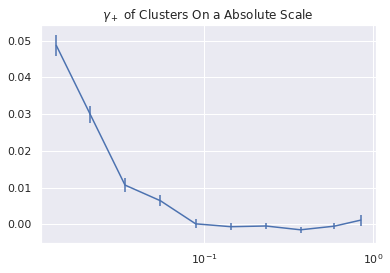

Aggregated xi:
[-72.8825 -93.0708 -52.5981 -51.8193  -1.6537  14.1954  14.7794  62.1652
  20.5802 -11.3641]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -6473.4803 -12017.4633 -16684.5622 -23499.21   -32286.1992 -41754.7944
 -46281.6882 -40892.9798 -21077.1094  -1700.9946]
------------------------------------------------------------------------------
Aggregated npairs:
[ 1497.  3113.  4927.  8098. 13333. 21519. 31634. 41339. 39818. 10108.]
------------------------------------------------------------------------------
Mean xi:
[-0.0487 -0.0299 -0.0107 -0.0064 -0.0001  0.0007  0.0005  0.0015  0.0005
 -0.0011]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3243 -3.8604 -3.3864 -2.9019 -2.4215 -1.9404 -1.463  -0.9892 -0.5293
 -0.1683]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

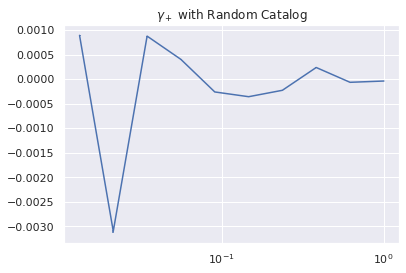

[ 8.9371e-04 -3.0974e-03  8.7790e-04  4.0420e-04 -2.5962e-04 -3.5651e-04
 -2.2586e-04  2.3870e-04 -6.3292e-05 -3.6901e-05]
[-8.1827e-06  2.8360e-05 -8.0379e-06 -3.7008e-06  2.3770e-06  3.2642e-06
  2.0679e-06 -2.1855e-06  5.7949e-07  3.3786e-07]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

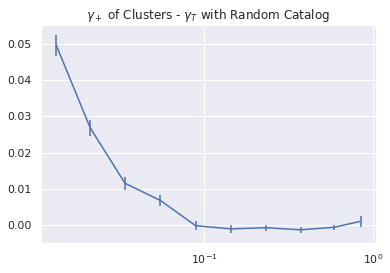

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

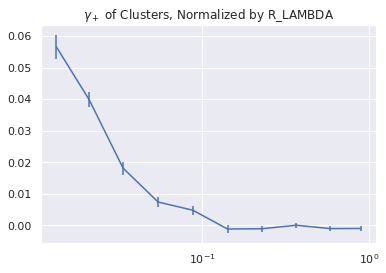

Aggregated xi:
[-46.2363 -90.4433 -71.6589 -46.8967 -49.5313  19.0895  27.3736  -2.271
  43.9127  27.3263]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3519.3394  -8762.1729 -13373.9469 -18369.0863 -24935.2204 -32916.1263
 -38530.8058 -37069.9915 -23423.4808  -3260.8189]
------------------------------------------------------------------------------
Aggregated npairs:
[  816.  2271.  3943.  6315. 10265. 16869. 26092. 36921. 43809. 28348.]
------------------------------------------------------------------------------
Mean xi:
[-5.6662e-02 -3.9825e-02 -1.8174e-02 -7.4262e-03 -4.8253e-03  1.1316e-03
  1.0491e-03 -6.1510e-05  1.0024e-03  9.6396e-04]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3129 -3.8583 -3.3918 -2.9088 -2.4291 -1.9513 -1.4767 -1.004  -0.5347
 -0.115 ]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)